# 第9章 绘图与可视化

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 9.1 简明matplotlib API入门

In [2]:
%matplotlib notebook

In [3]:
data = np.arange(10)

In [4]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


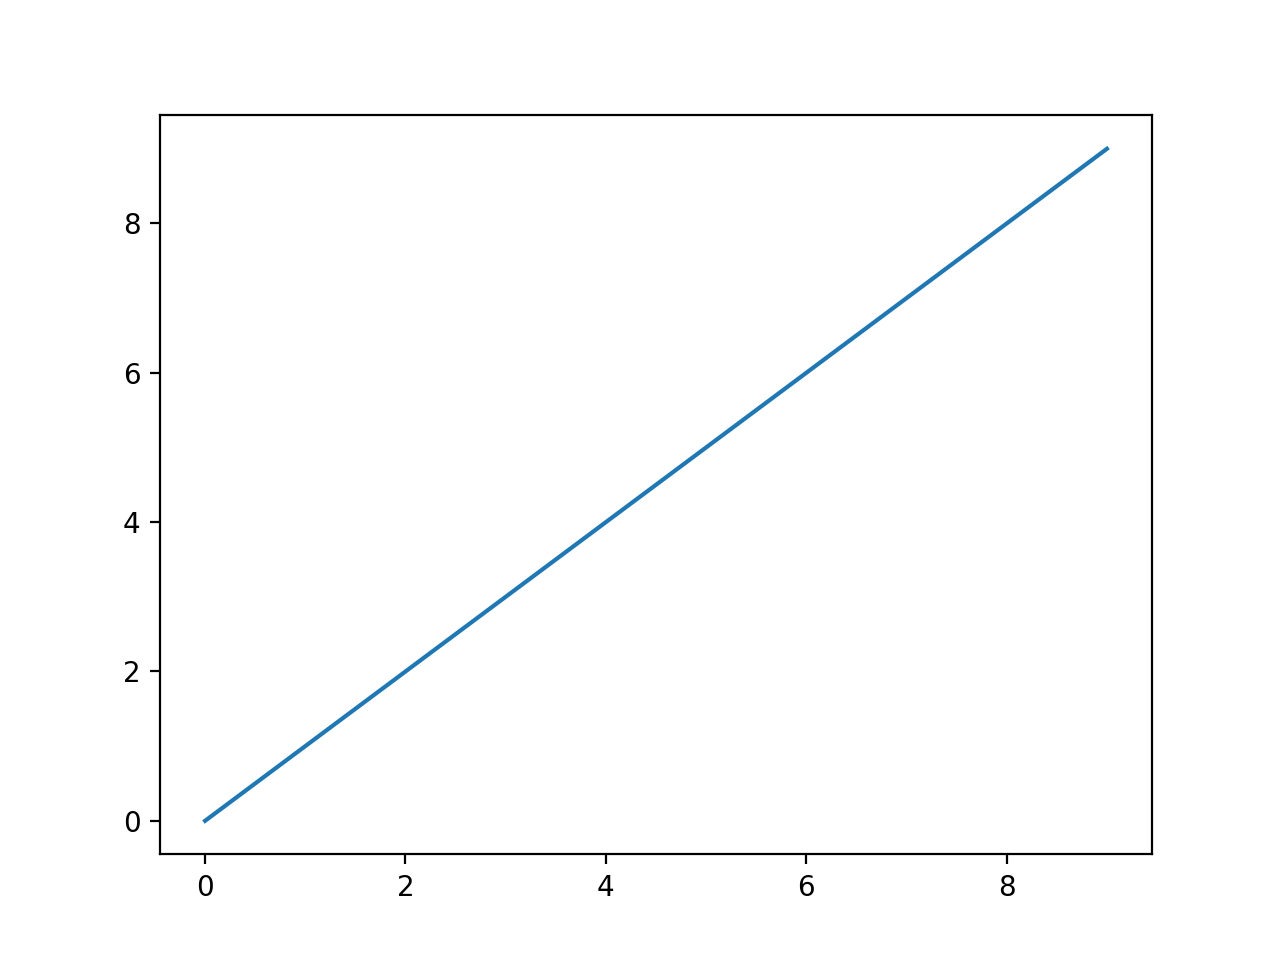

In [5]:
plt.plot(data)

### 9.1.1 图片与子图

<IPython.core.display.Javascript object>


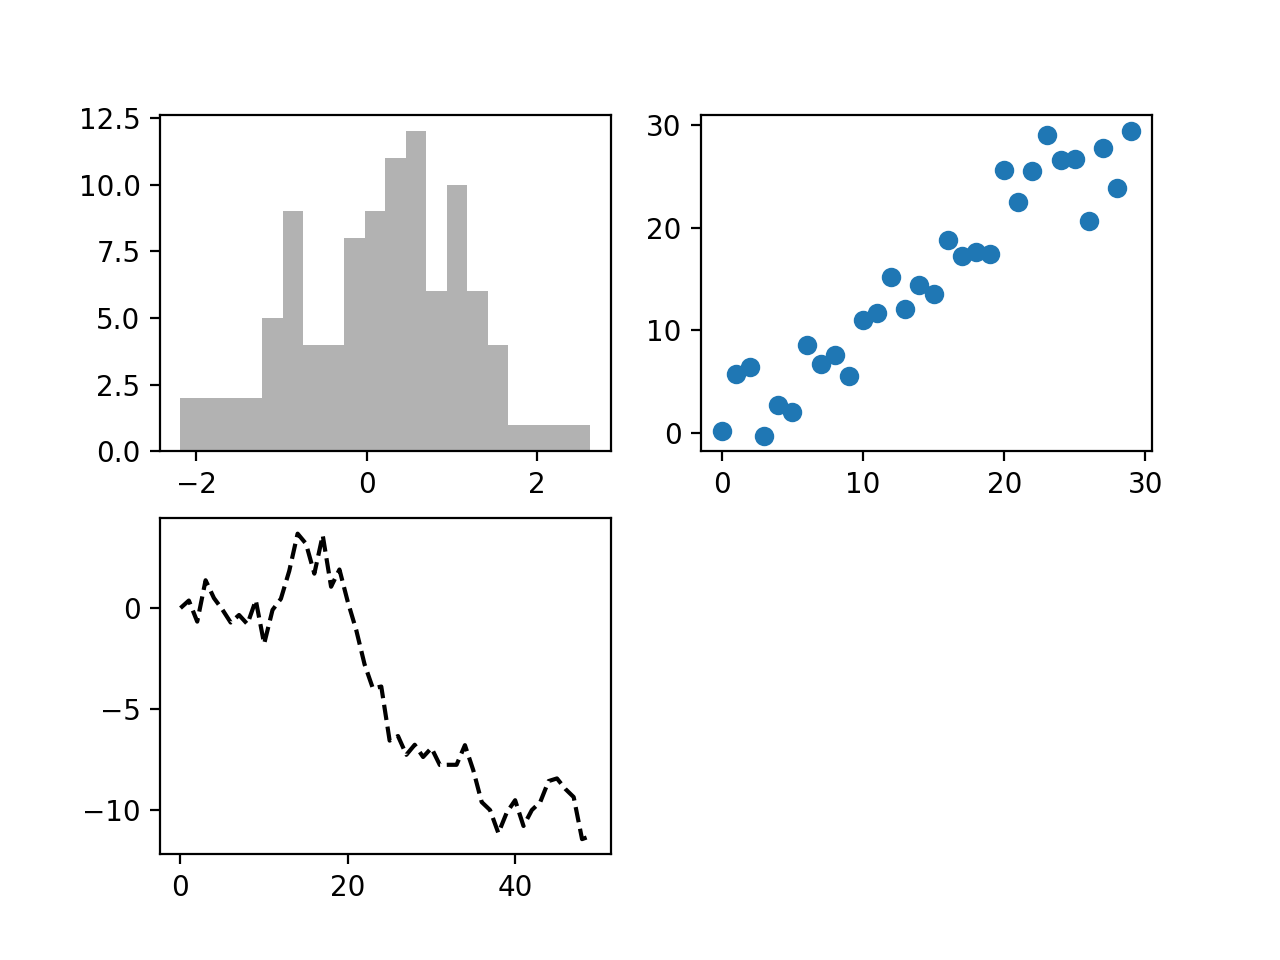

In [6]:
fig = plt.figure()

In [7]:
ax1 = fig.add_subplot(2, 2, 1)

In [8]:
ax2 = fig.add_subplot(2, 2, 2)

In [9]:
ax3 = fig.add_subplot(2, 2, 3)

In [10]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [11]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [12]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

<IPython.core.display.Javascript object>


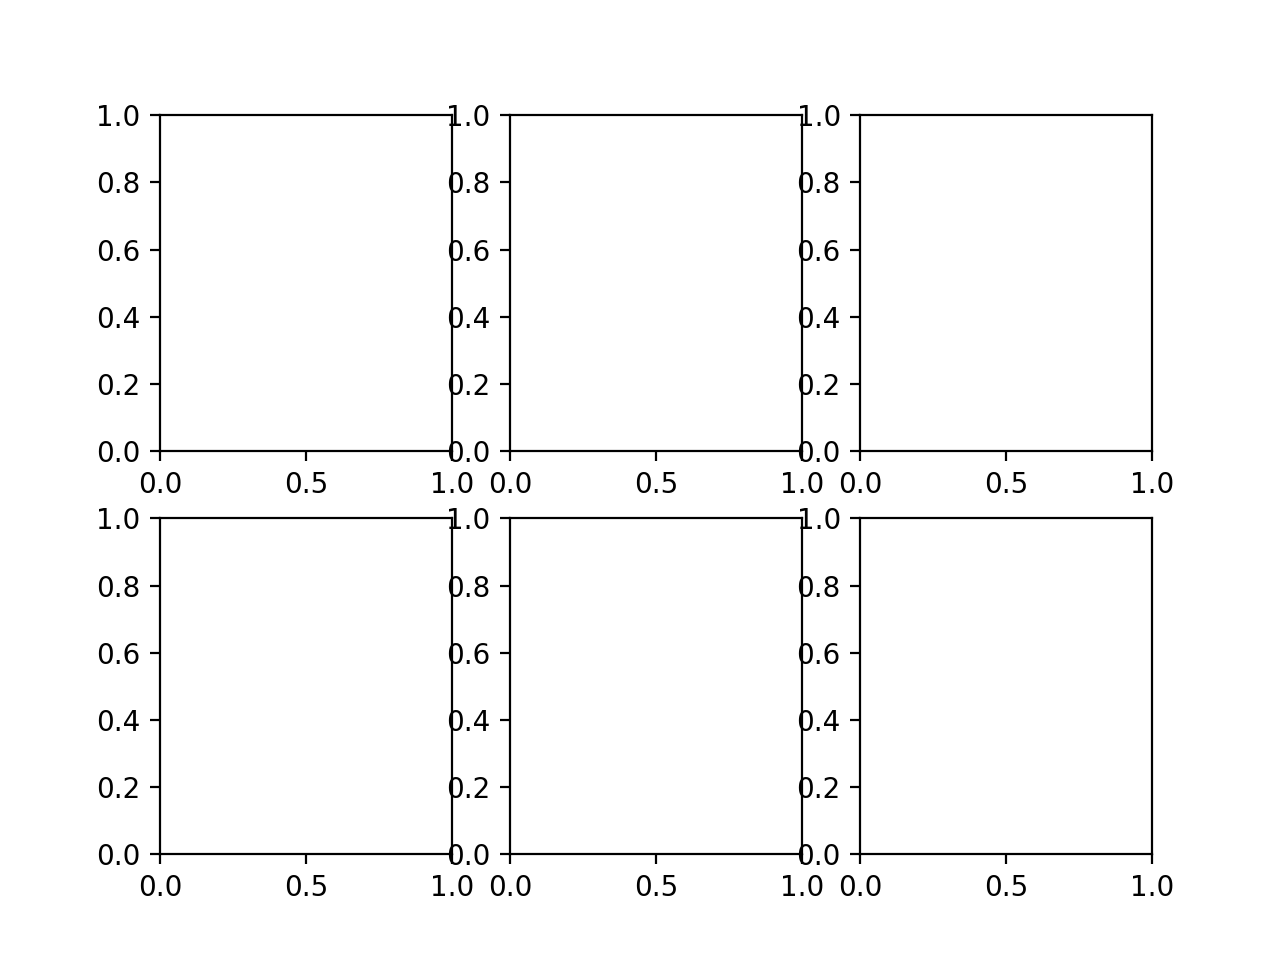

In [13]:
fig, axes = plt.subplots(2, 3)

In [14]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e21d2d0>,
      dtype=object)

#### 9.1.1.1 调整子图周围的间距

<IPython.core.display.Javascript object>


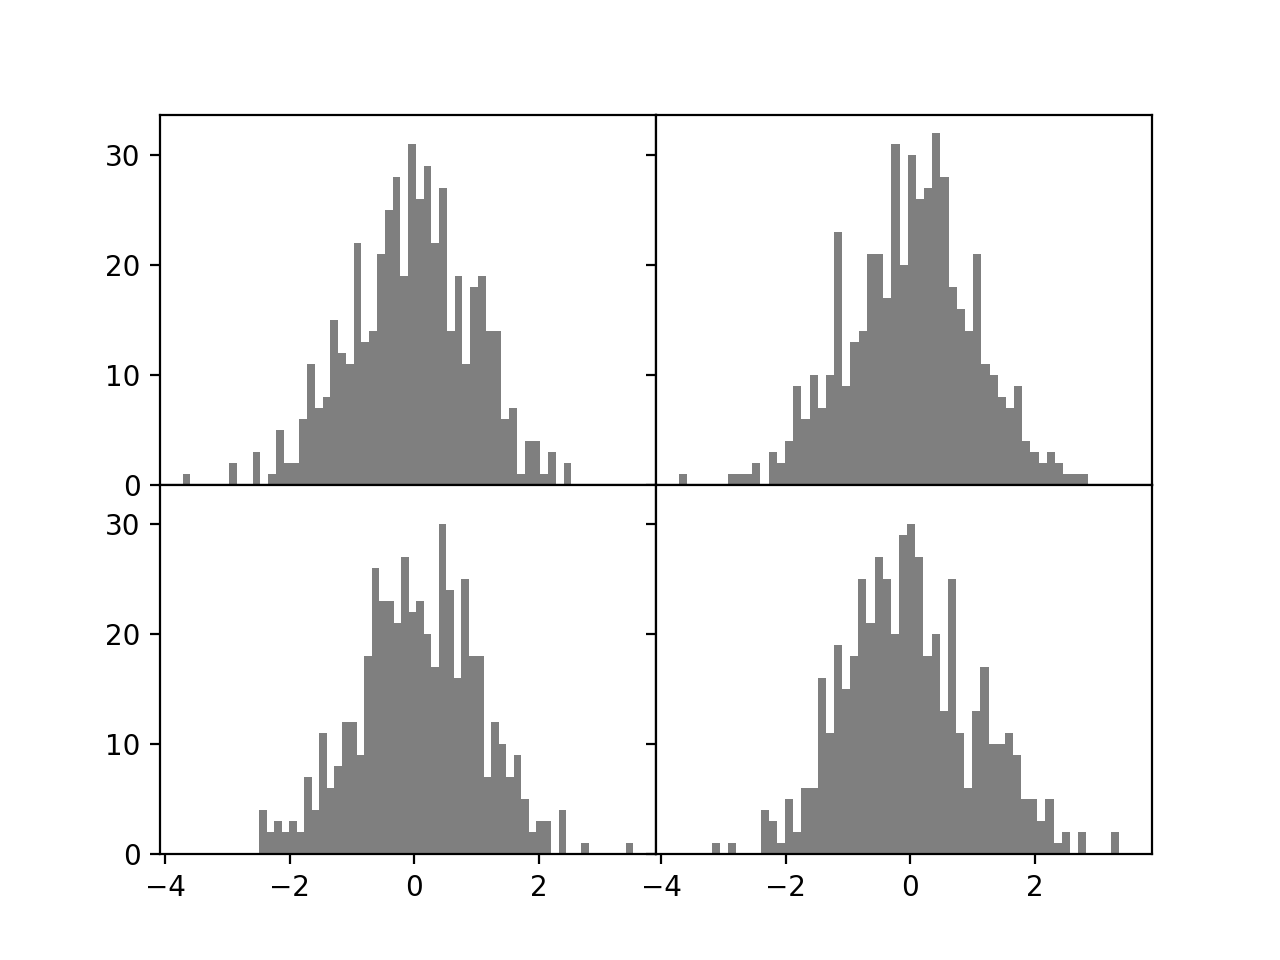

In [15]:
fix, axes = plt.subplots(2, 2, sharex=True, sharey=True)

In [16]:
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)

In [17]:
plt.subplots_adjust(wspace=0, hspace=0)

### 9.1.2 颜色、标记和线类型

<IPython.core.display.Javascript object>


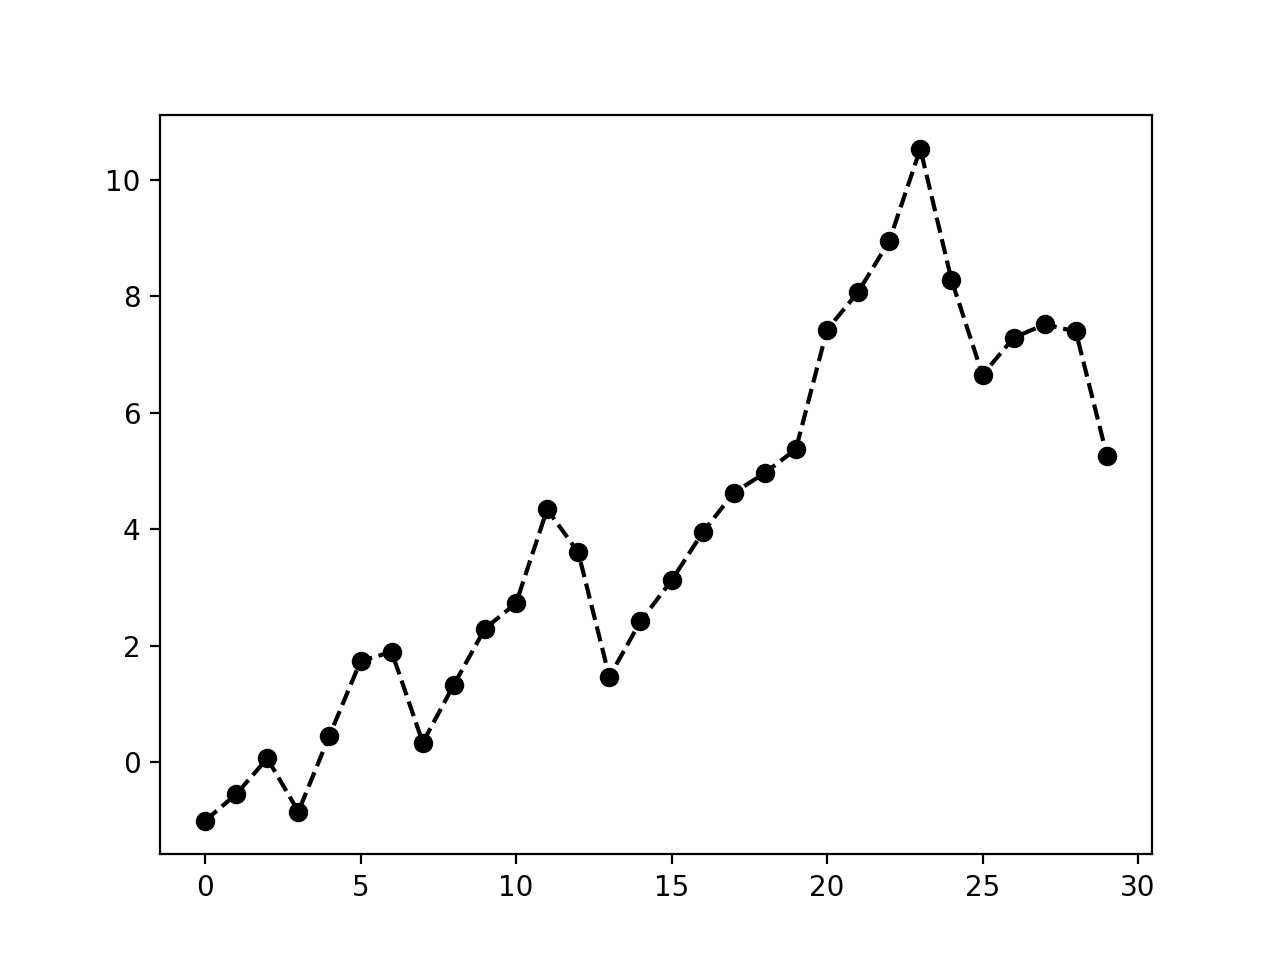

In [18]:
fig = plt.figure()
plt.plot(np.random.randn(30).cumsum(), 'ko--')

In [19]:
data = np.random.randn(30).cumsum()

<IPython.core.display.Javascript object>


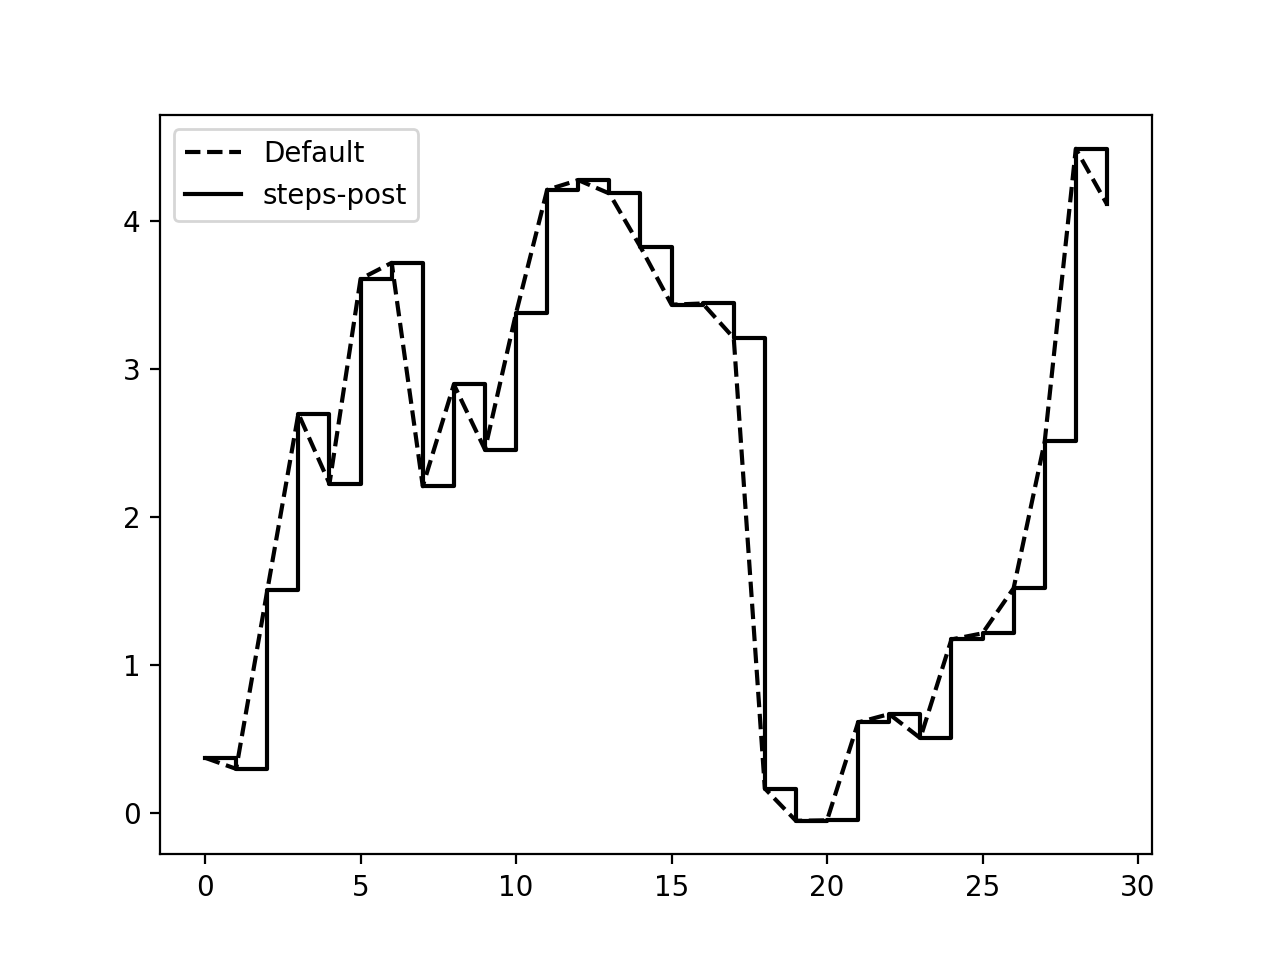

In [20]:
fig = plt.figure()
plt.plot(data, 'k--', label='Default')

In [21]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

In [22]:
plt.legend(loc='best')

### 9.1.3 刻度、标签和图例

#### 9.1.3.1 设置标题、轴标签、刻度和刻度标签

<IPython.core.display.Javascript object>


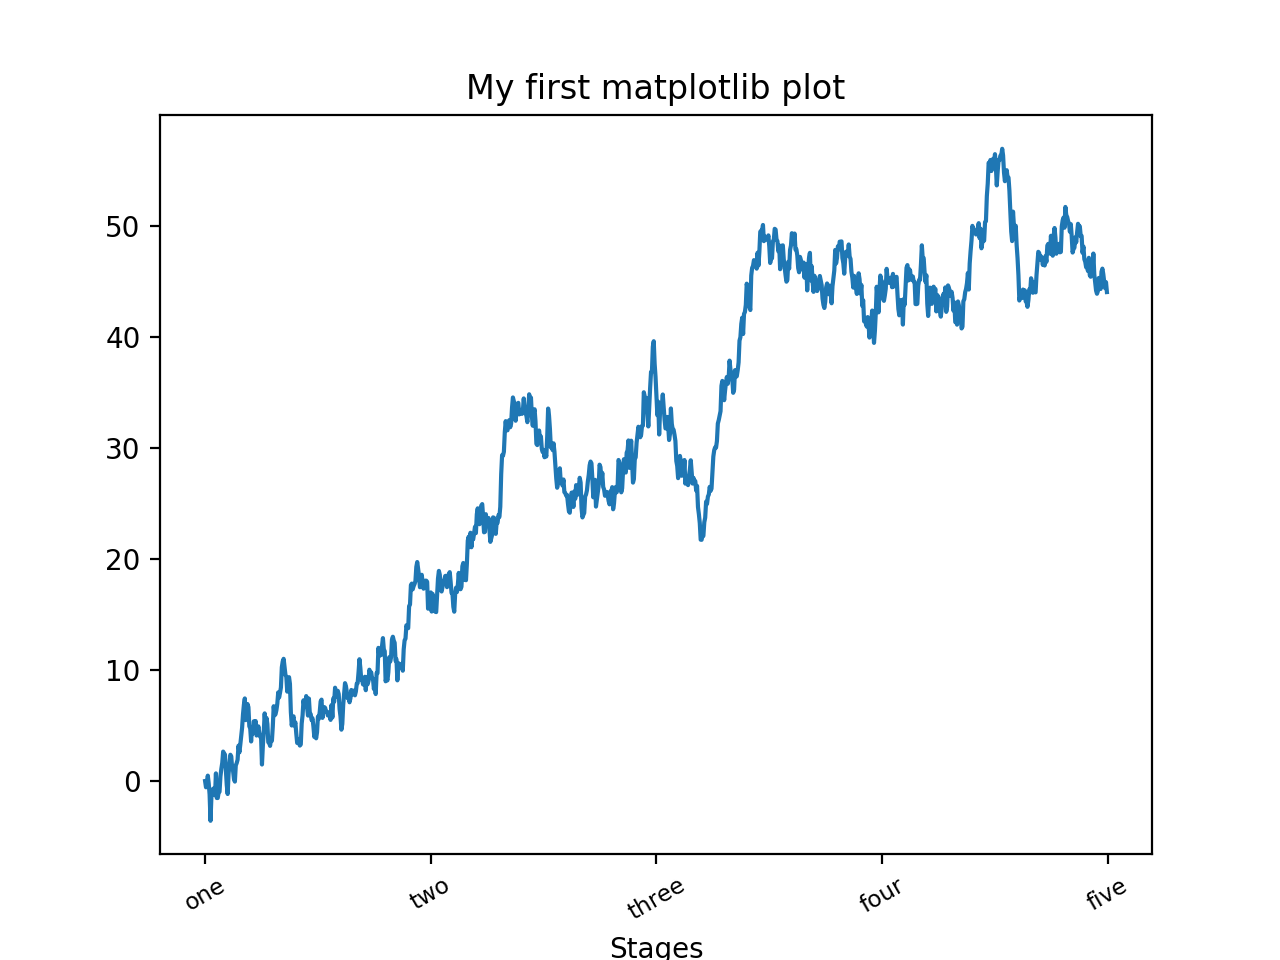

In [23]:
fig = plt.figure()

In [24]:
ax = fig.add_subplot(1, 1, 1)

In [25]:
ax.plot(np.random.randn(1000).cumsum())

In [26]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [27]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize='small')

In [28]:
ax.set_title('My first matplotlib plot')

Text(0.5, 1.0, 'My first matplotlib plot')

In [29]:
ax.set_xlabel('Stages')

Text(0.5, 0, 'Stages')

In [30]:
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

[Text(0.5, 0, 'Stages'), Text(0.5, 1.0, 'My first matplotlib plot')]

#### 9.1.3.2 添加图例

<IPython.core.display.Javascript object>


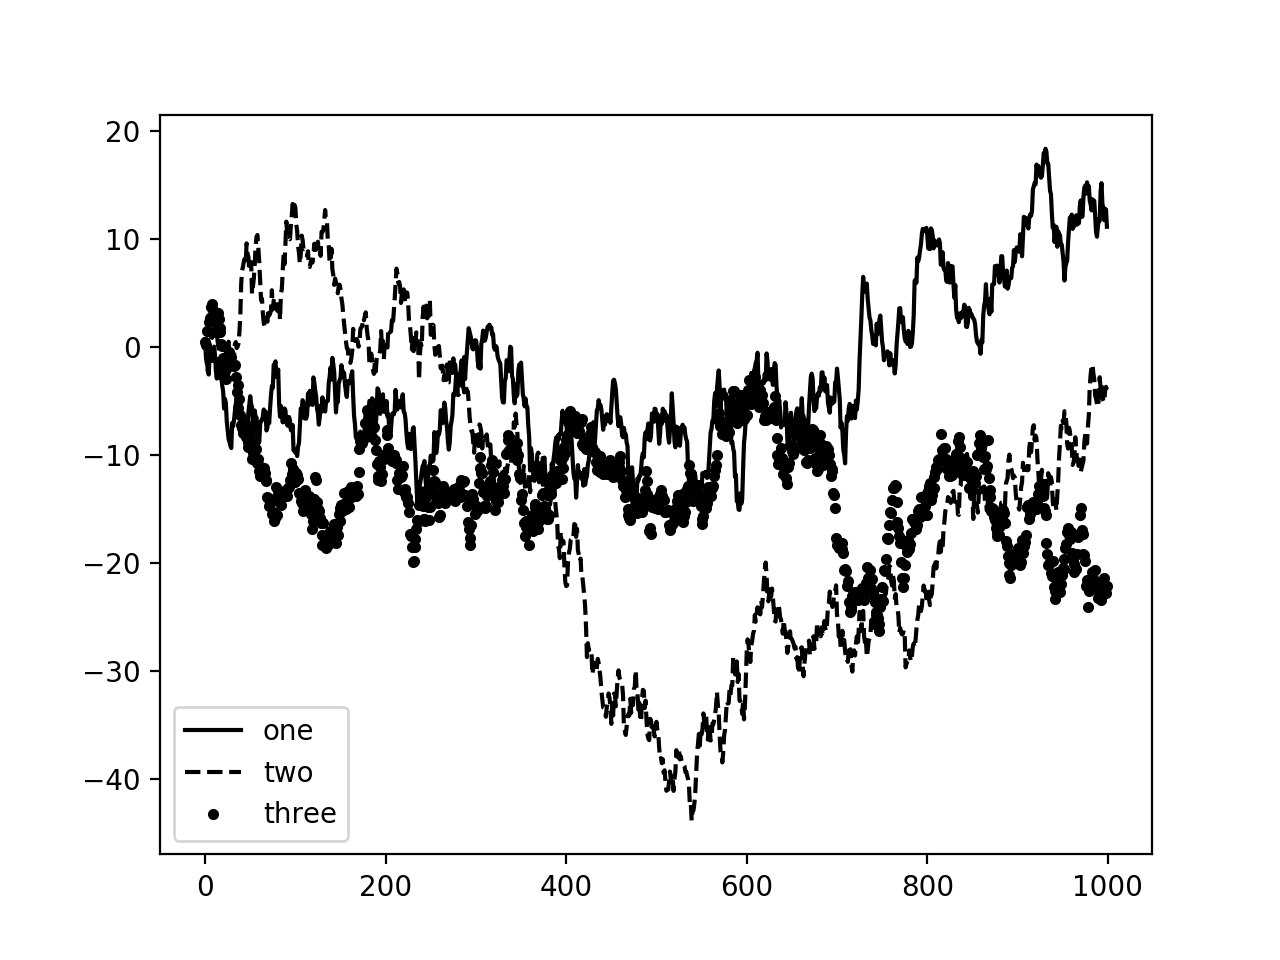

In [31]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

In [32]:
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')

In [33]:
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two')

In [34]:
ax.plot(np.random.randn(1000).cumsum(), 'k.', label='three')

In [35]:
ax.legend(loc='best')

### 9.1.4 注释与子图加工

<IPython.core.display.Javascript object>


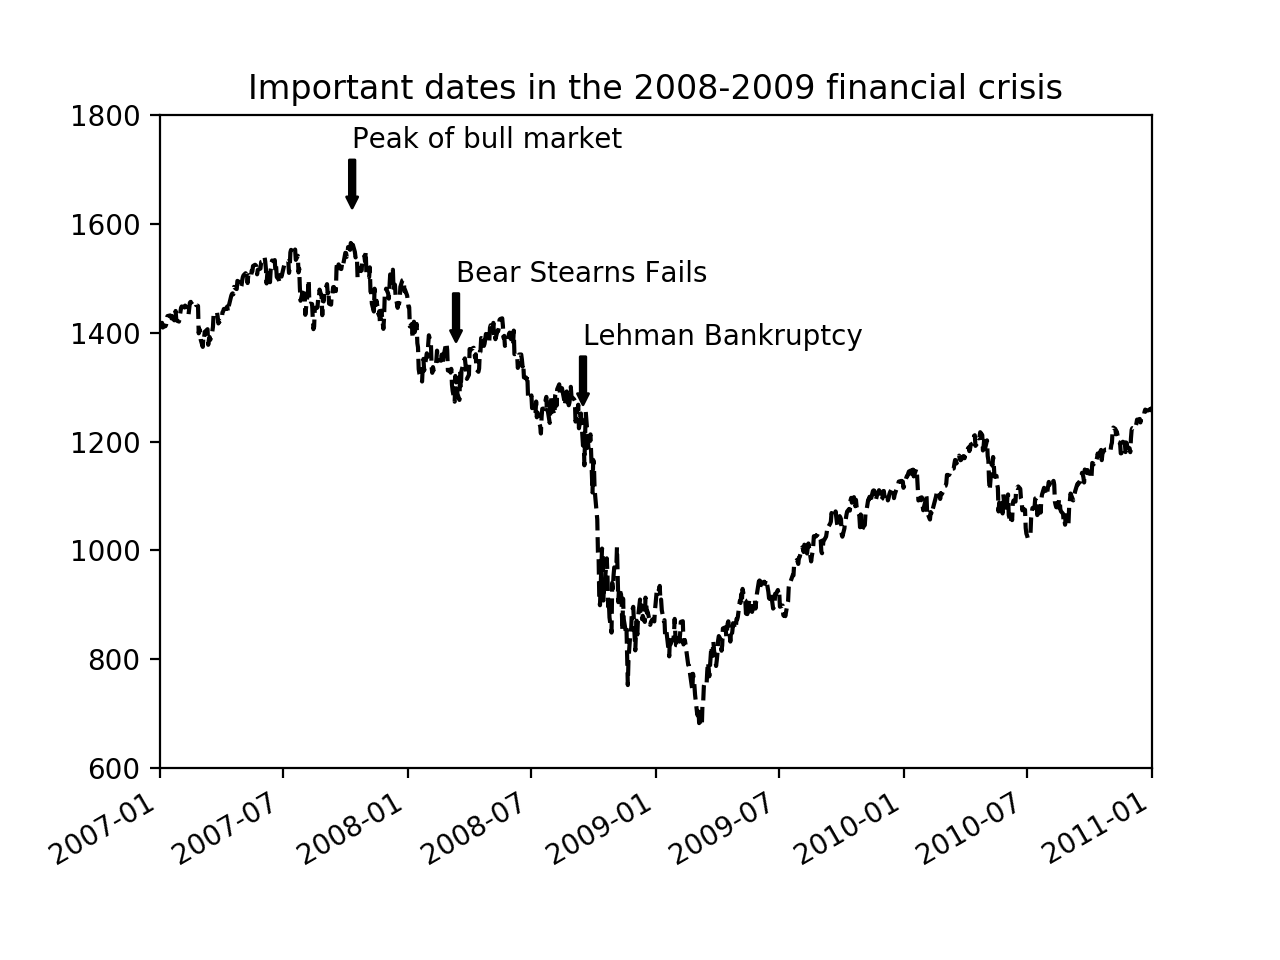

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

In [36]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k--')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
               xytext=(date, spx.asof(date) + 225),
               arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
               horizontalalignment='left', verticalalignment='top')
    
# 放大2007年~2010年
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

<IPython.core.display.Javascript object>


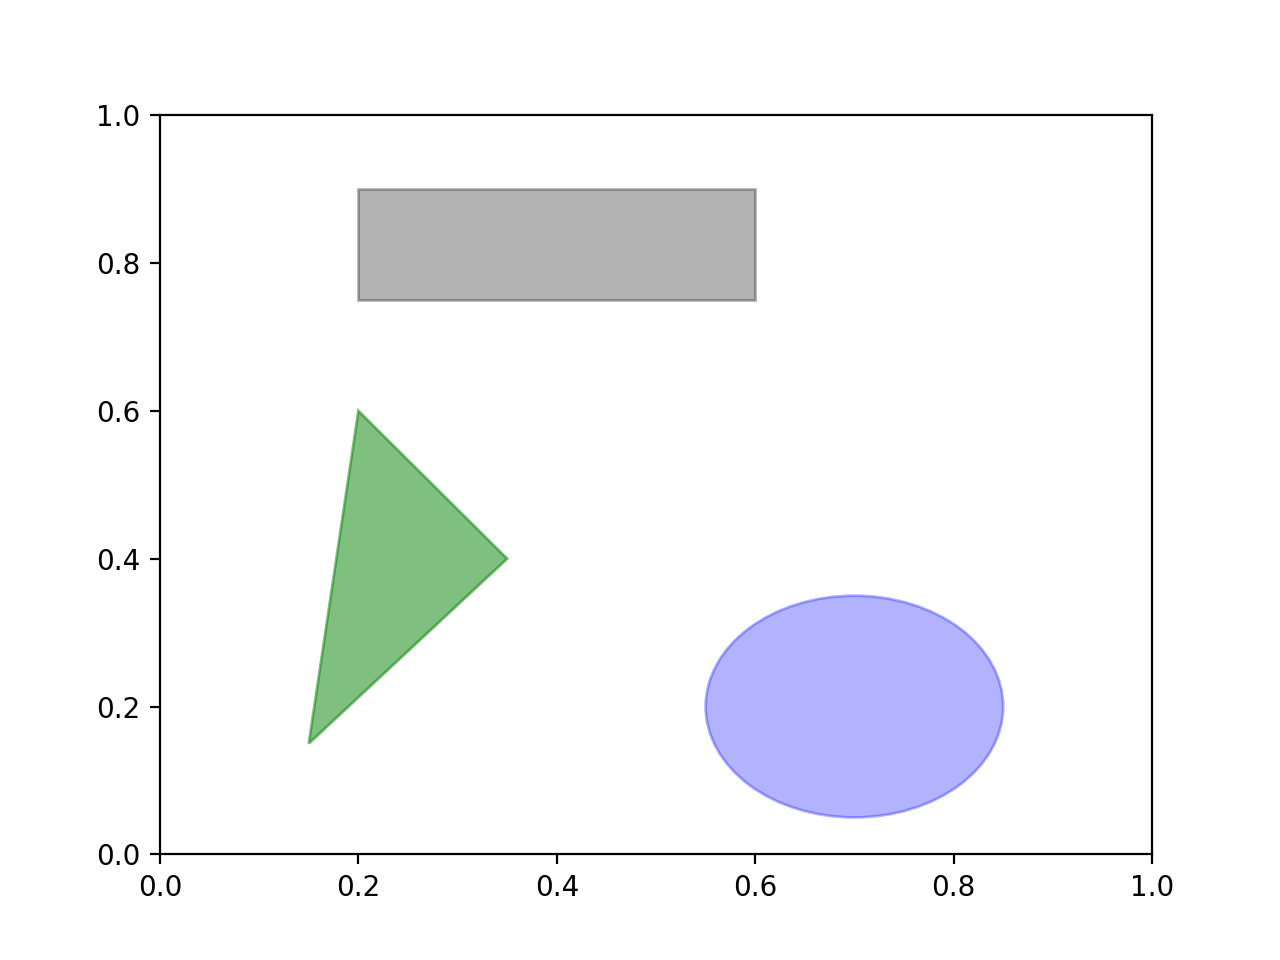

In [37]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                  color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## 9.2 使用pandas和seaborn绘图

### 9.2.1 折线图

In [38]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

<IPython.core.display.Javascript object>


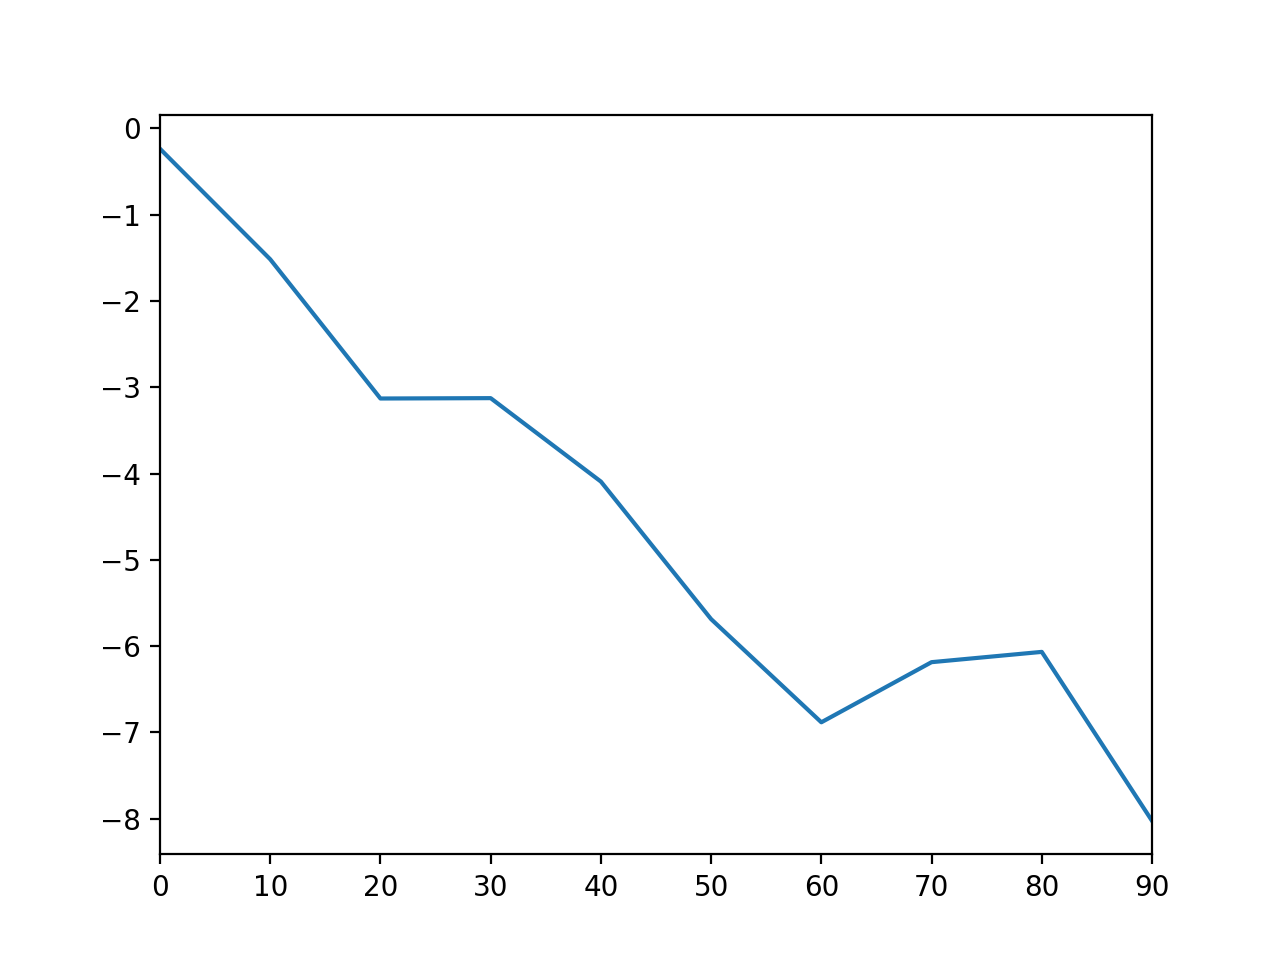

In [39]:
fig = plt.figure()
s.plot()

<IPython.core.display.Javascript object>


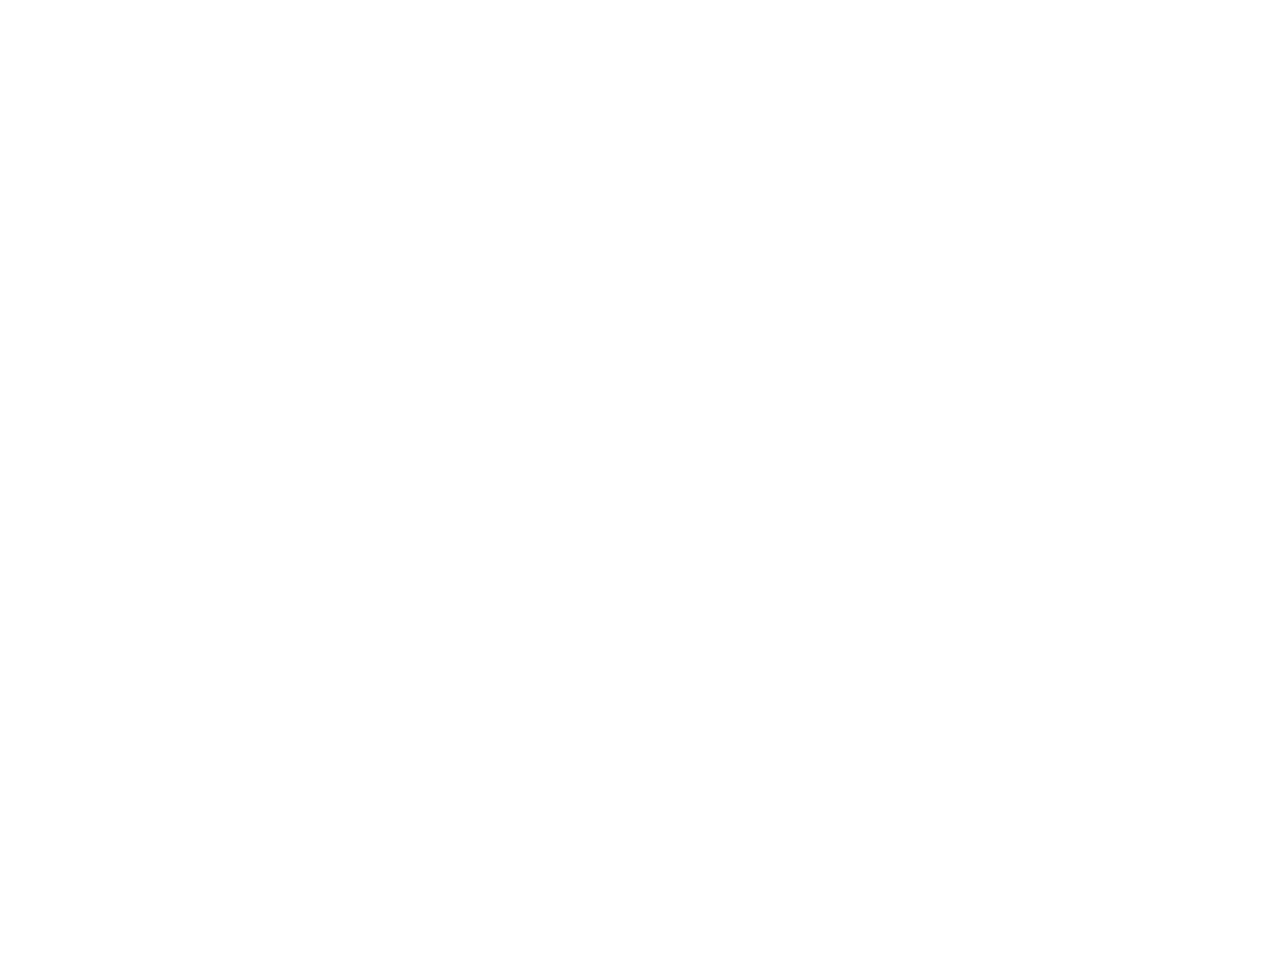

<IPython.core.display.Javascript object>


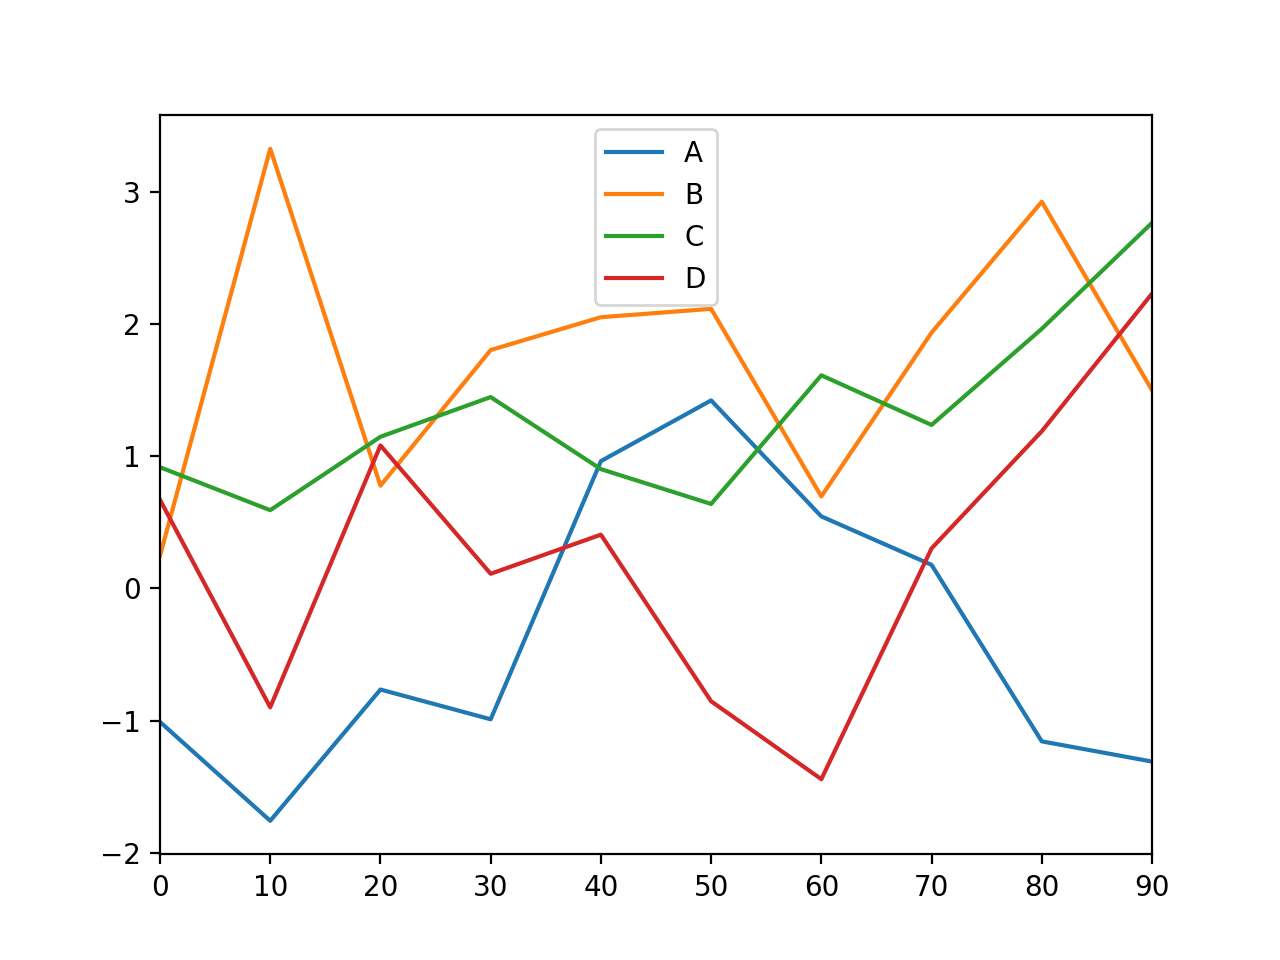

In [40]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                 columns=['A', 'B', 'C', 'D'],
                 index=np.arange(0, 100, 10))
df.plot()

### 9.2.2 柱状图

<IPython.core.display.Javascript object>


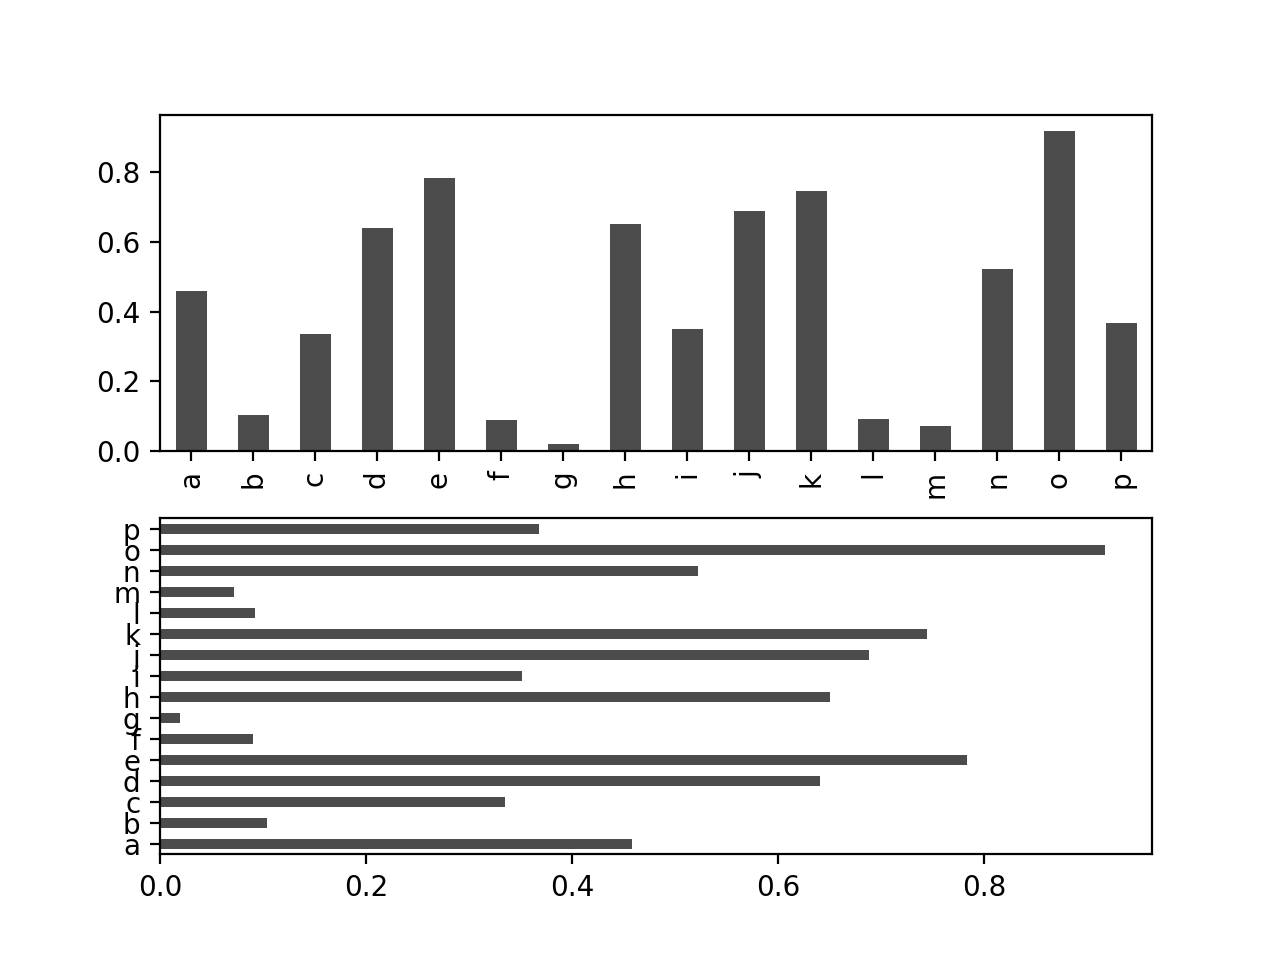

In [41]:
fig, axes = plt.subplots(2, 1)

In [42]:
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

In [43]:
data.plot.bar(ax=axes[0], color='k', alpha=0.7)

In [44]:
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [45]:
df = pd.DataFrame(np.random.rand(6, 4),
                 index=['one', 'two', 'three', 'four', 'five', 'six'],
                 columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

<IPython.core.display.Javascript object>


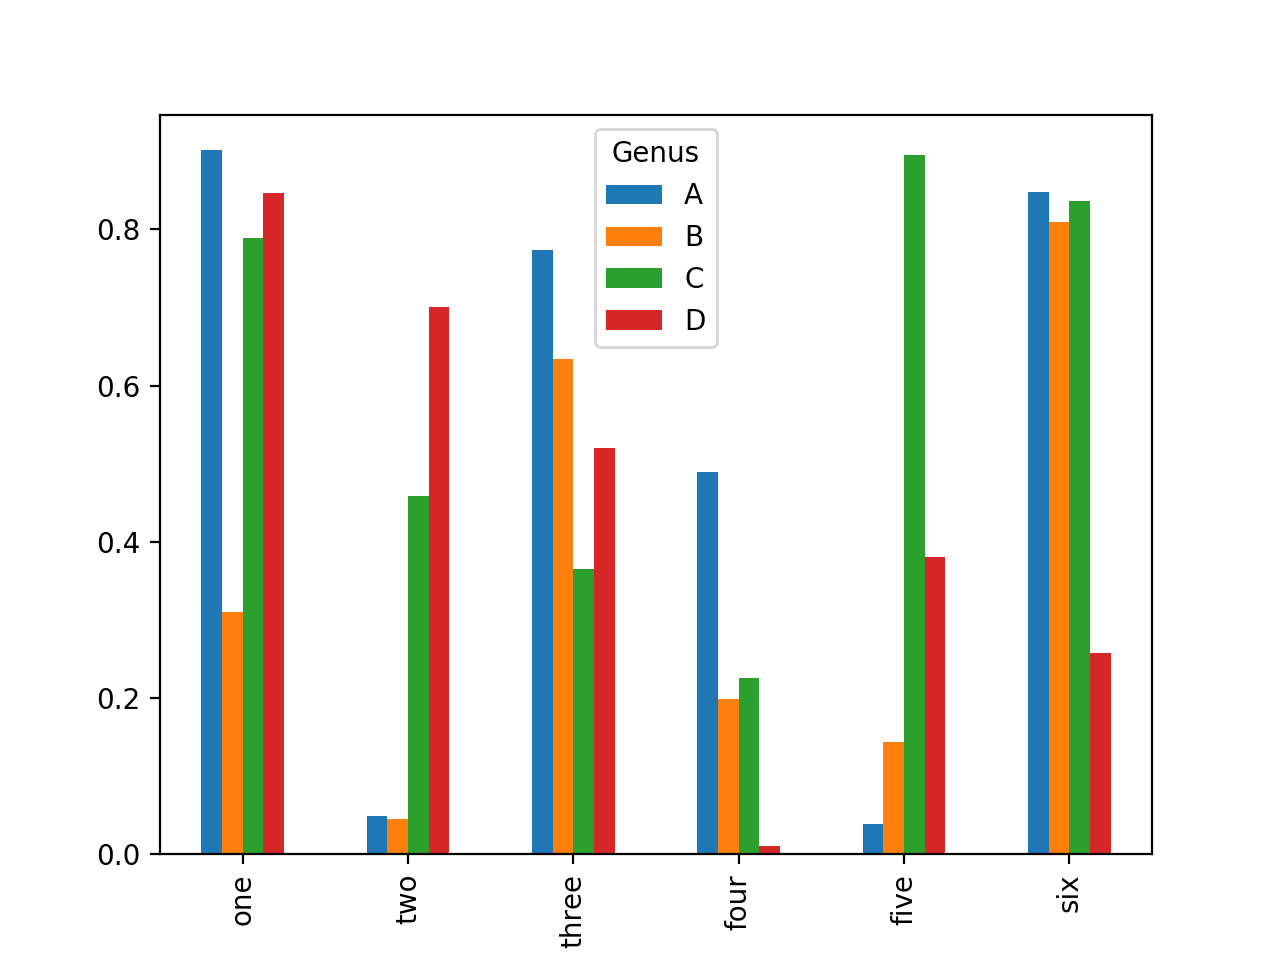

In [46]:
df.plot.bar()

<IPython.core.display.Javascript object>


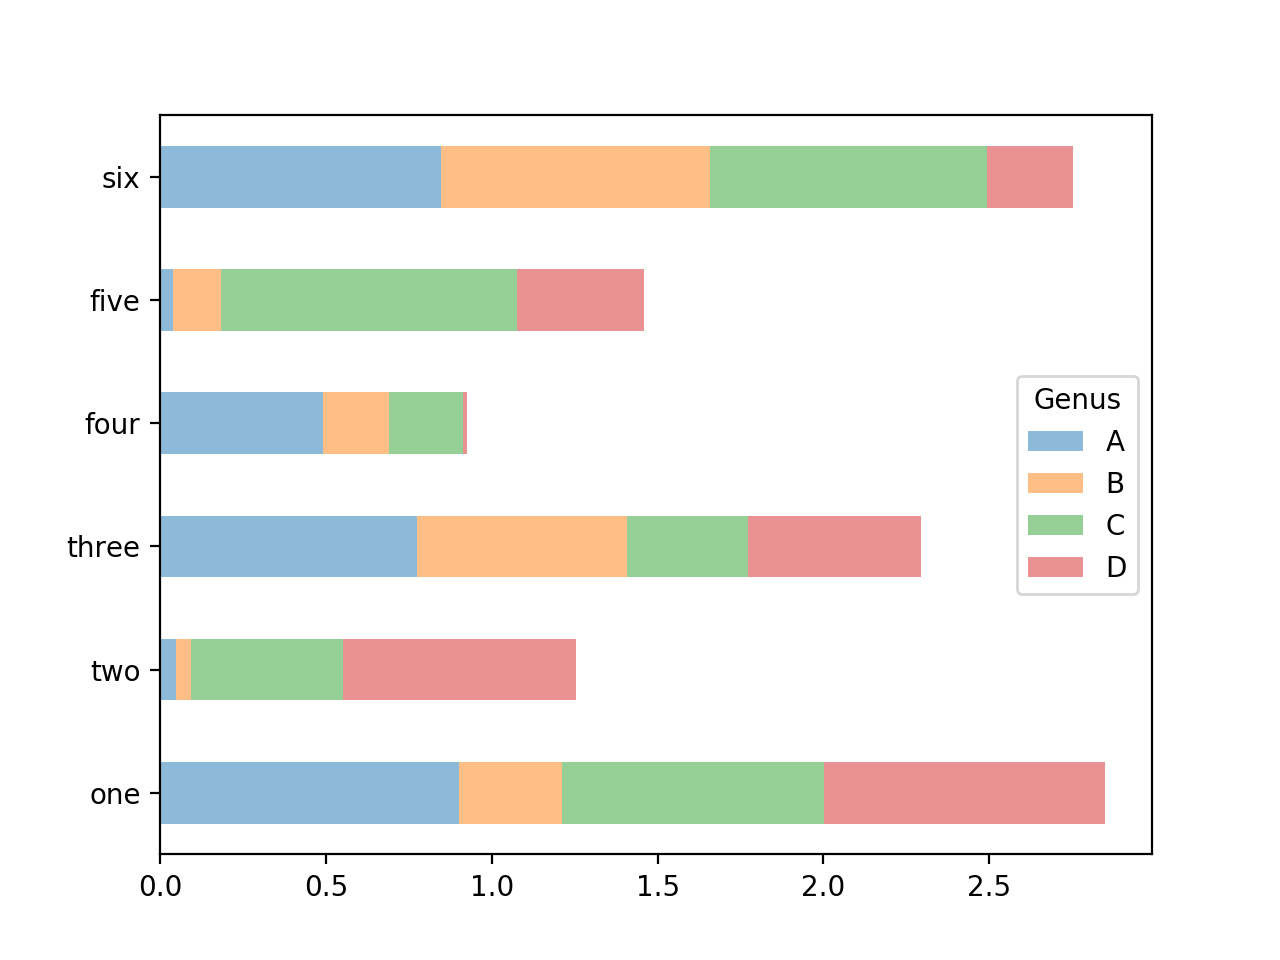

In [47]:
df.plot.barh(stacked=True, alpha=0.5)

In [48]:
tips = pd.read_csv('examples/tips.csv')

In [49]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [50]:
party_counts

size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3

In [51]:
party_counts = party_counts.loc[:, 2:5]

In [52]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)

In [53]:
party_pcts

size         2         3         4         5
day                                         
Fri   0.888889  0.055556  0.055556  0.000000
Sat   0.623529  0.211765  0.152941  0.011765
Sun   0.520000  0.200000  0.240000  0.040000
Thur  0.827586  0.068966  0.086207  0.017241

<IPython.core.display.Javascript object>


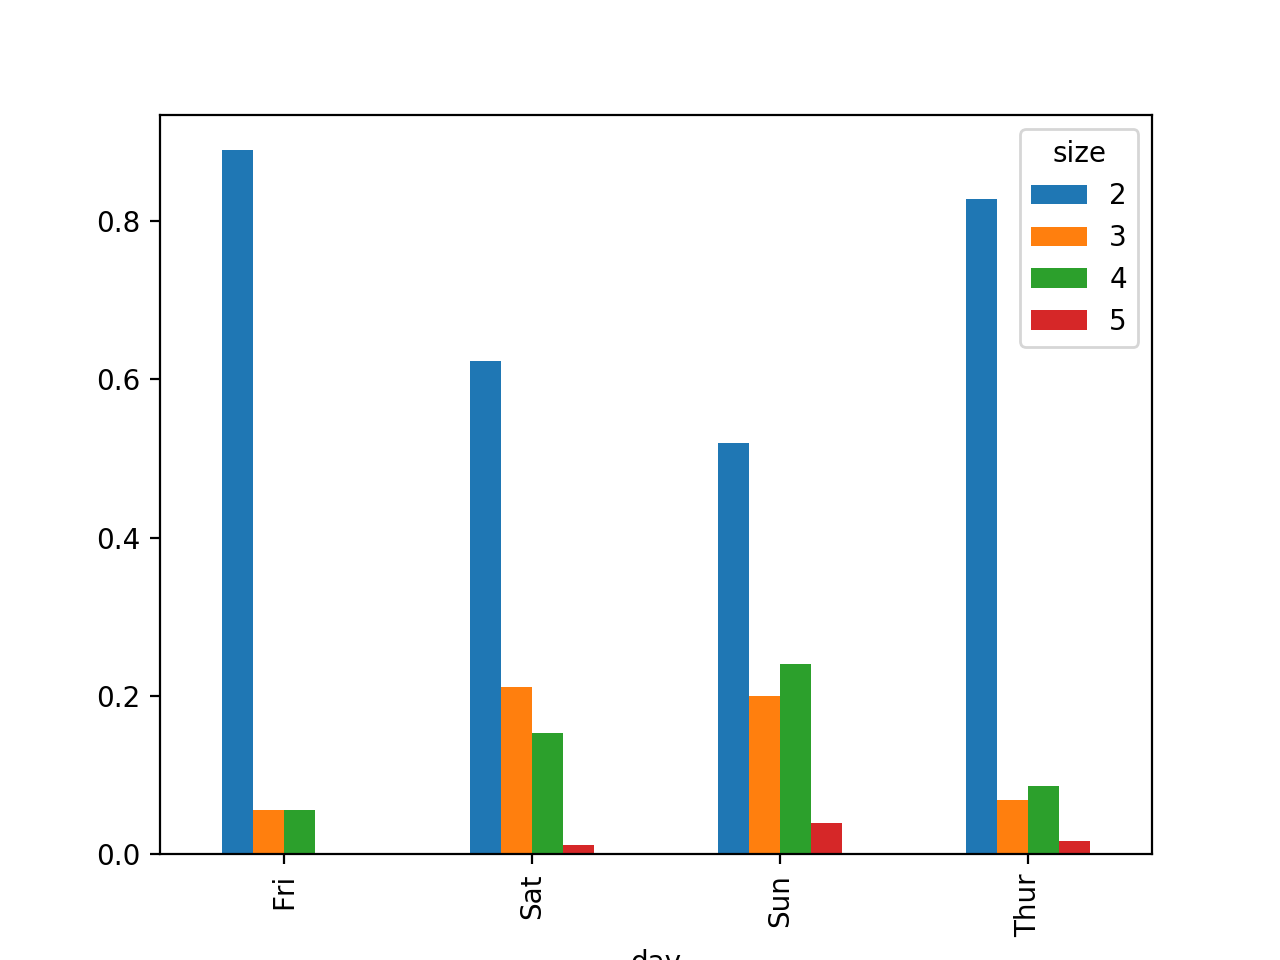

In [62]:
party_pcts.plot.bar()

In [57]:
import seaborn as sns

In [58]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [59]:
tips.head()

total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069

<IPython.core.display.Javascript object>


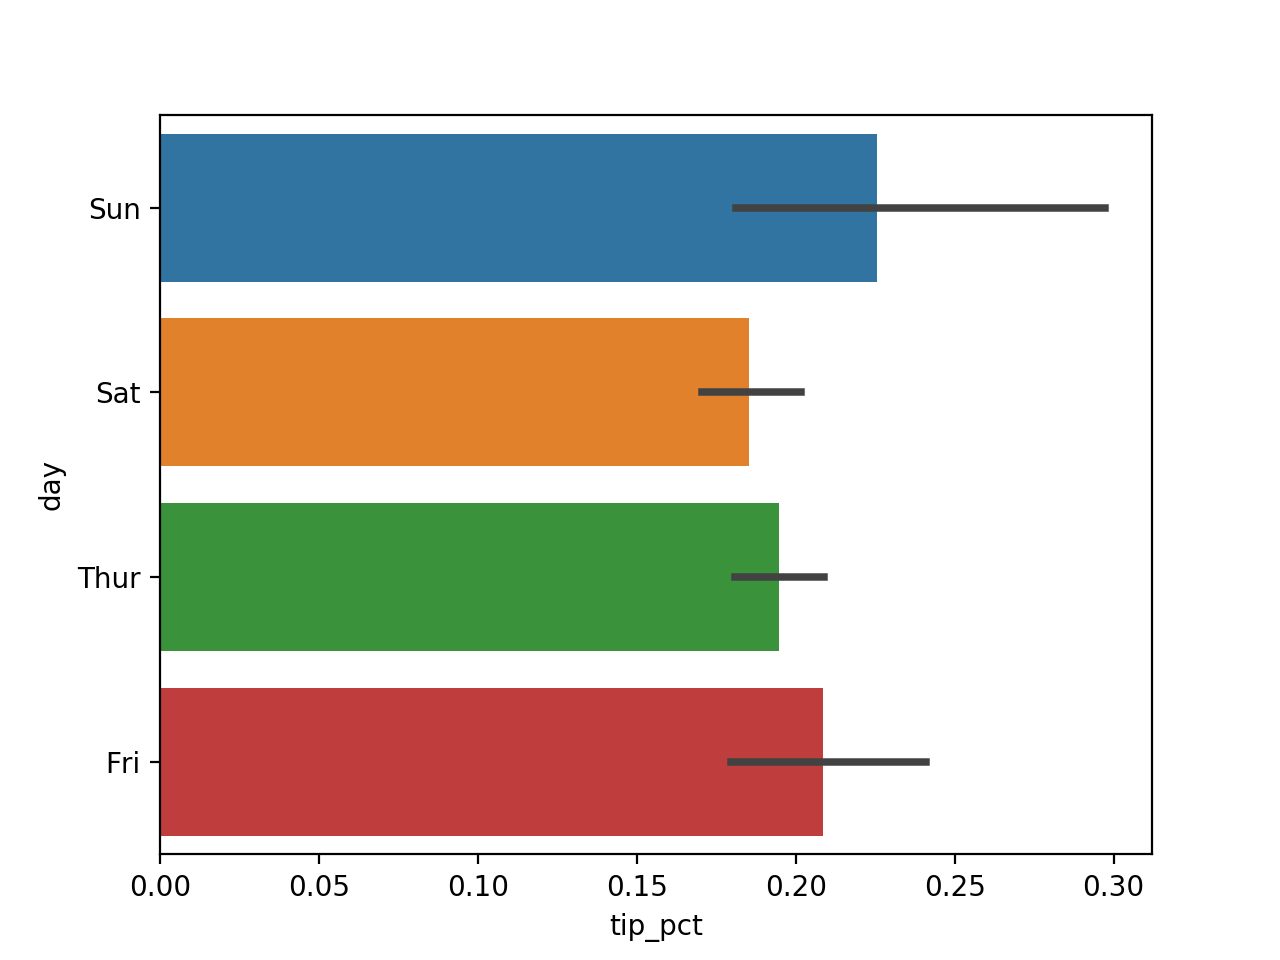

In [61]:
fig = plt.figure()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

<IPython.core.display.Javascript object>


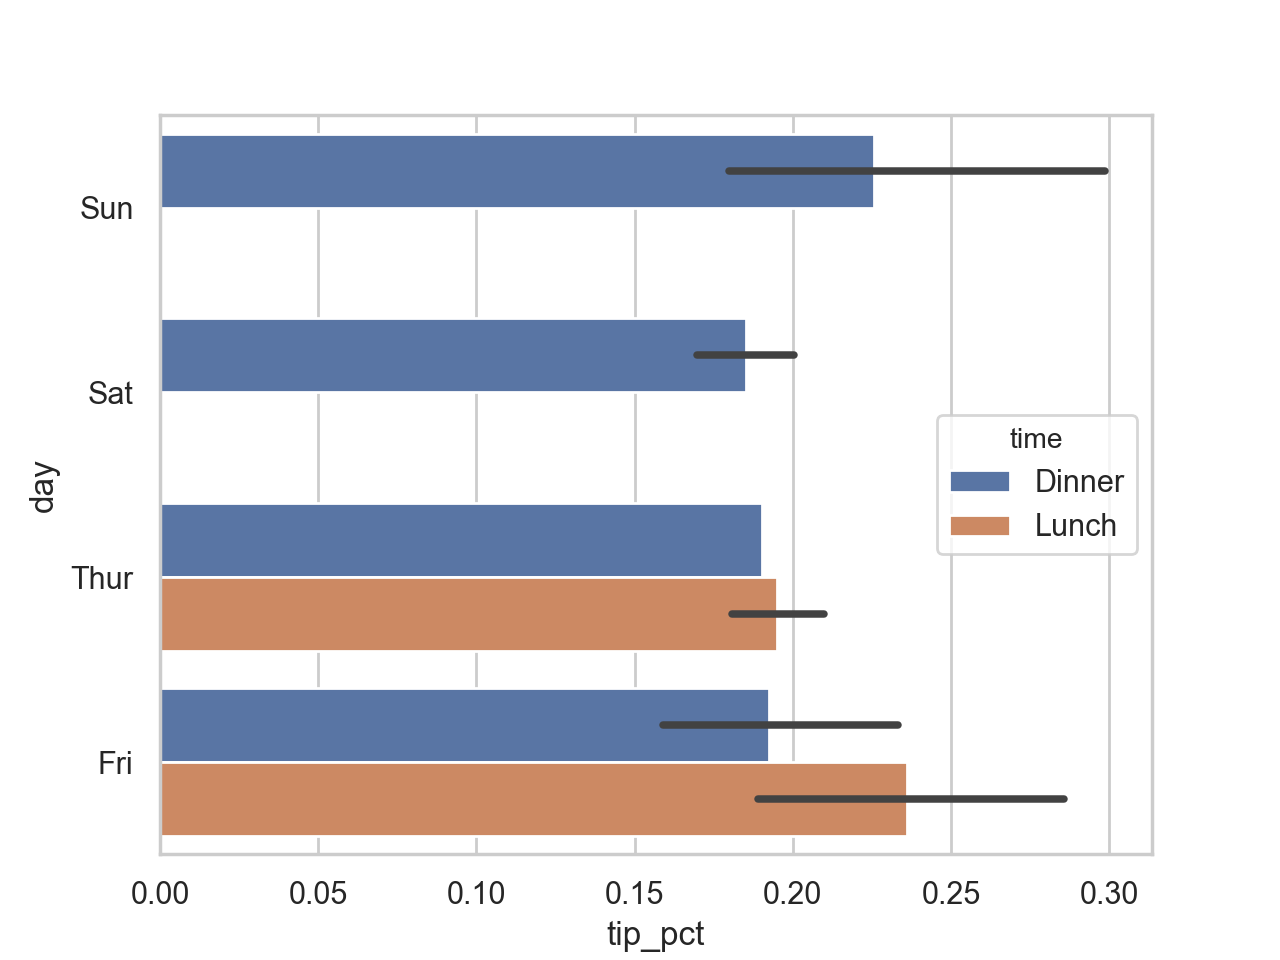

In [67]:
fig = plt.figure()
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [65]:
sns.set(style='whitegrid')

### 9.2.3 直方图和密度图

<IPython.core.display.Javascript object>


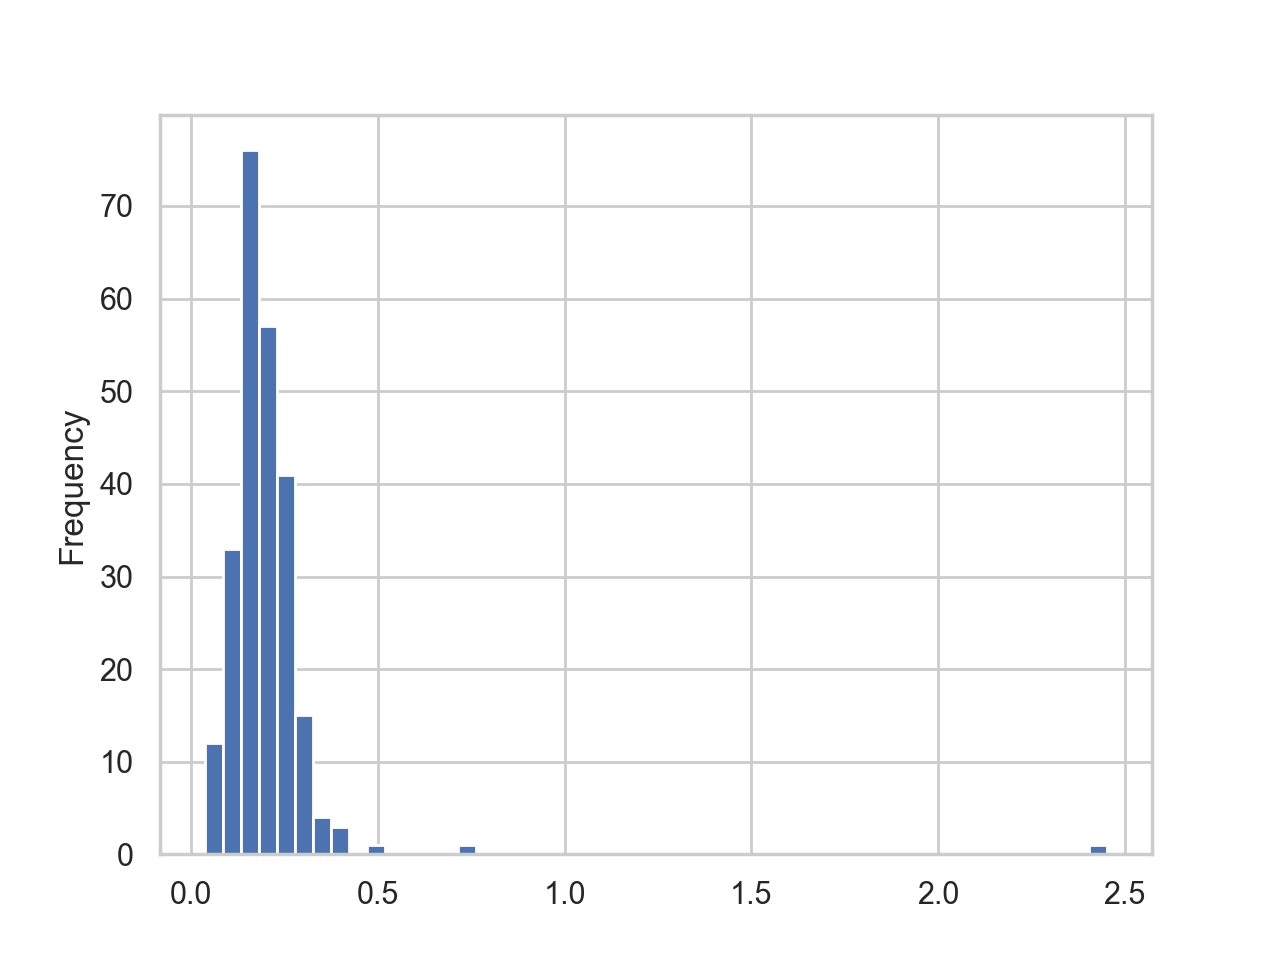

In [68]:
fig = plt.figure()
tips['tip_pct'].plot.hist(bins=50)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


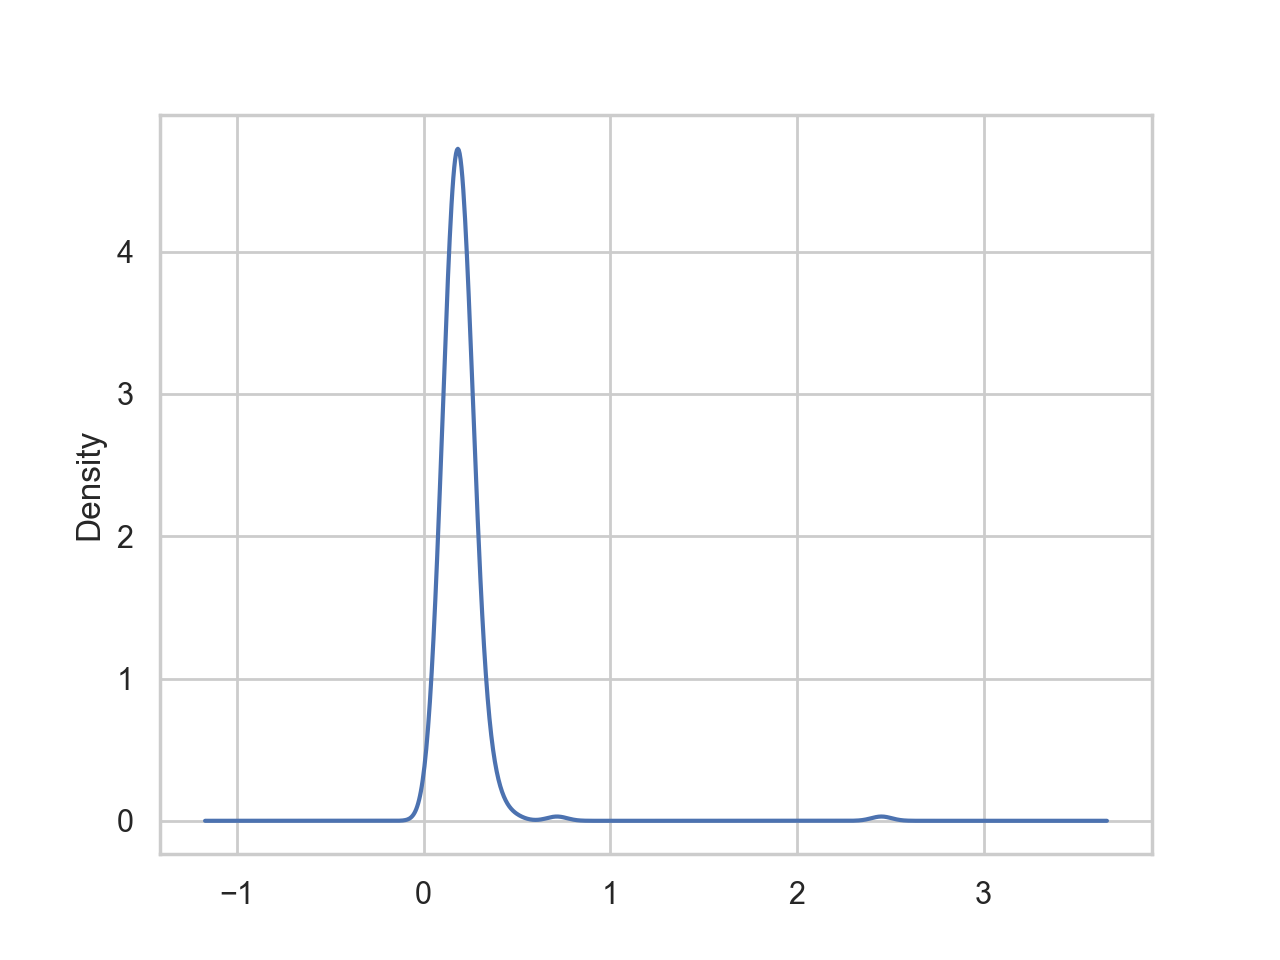

In [70]:
fig = plt.figure()
tips['tip_pct'].plot.density()

In [71]:
comp1 = np.random.normal(0, 1, size=200)

In [72]:
comp2 = np.random.normal(10, 2, size=200)

In [73]:
values = pd.Series(np.concatenate([comp1, comp2]))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


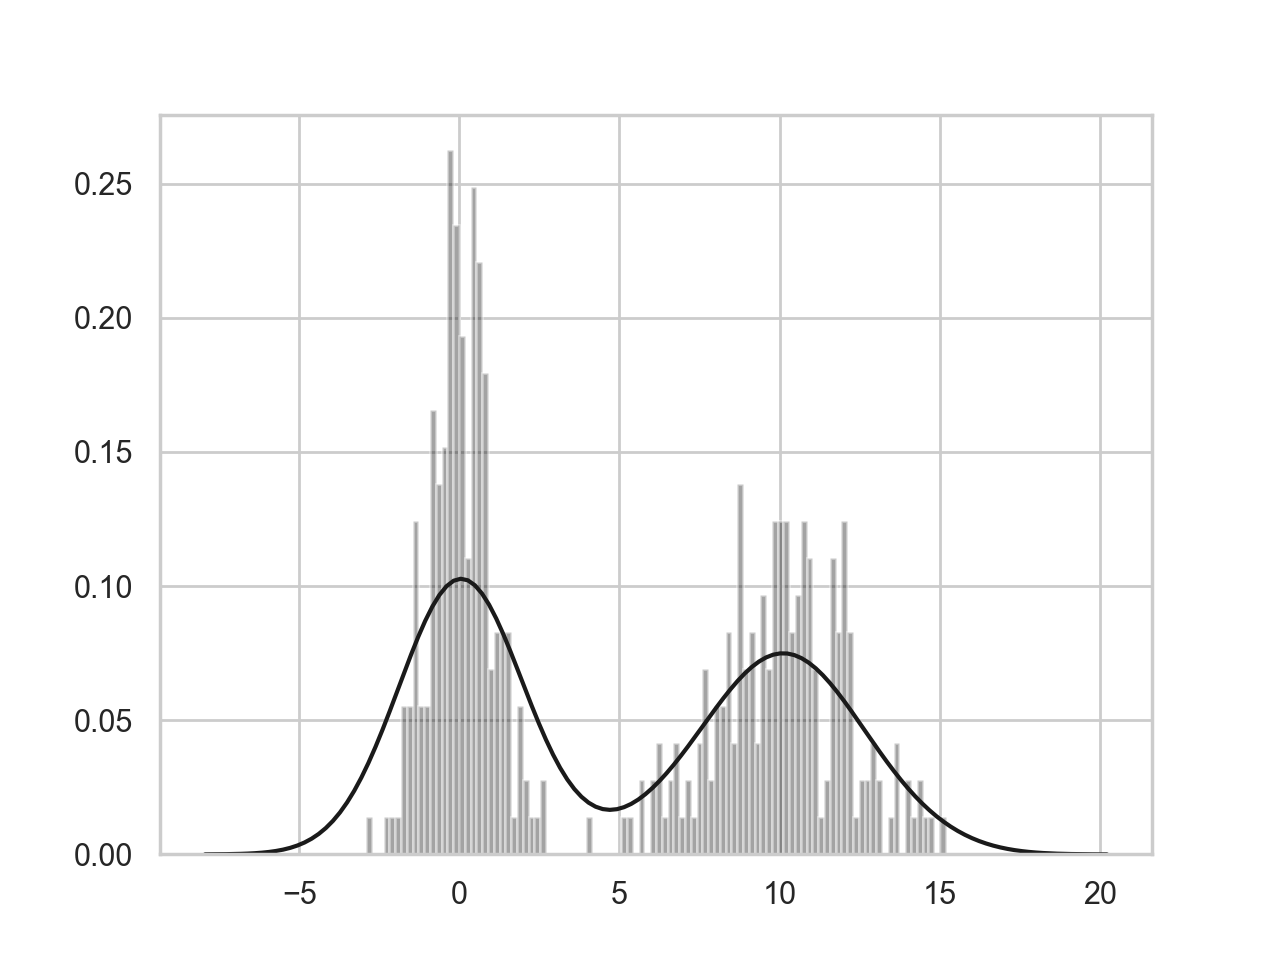

In [74]:
plt.figure()
sns.distplot(values, bins=100, color='k')

### 9.2.4 散点图或点图

In [75]:
macro = pd.read_csv('examples/macrodata.csv')

In [77]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [78]:
trans_data = np.log(data).diff().dropna()

In [79]:
trans_data[-5:]

cpi        m1  tbilrate     unemp
198 -0.007904  0.045361 -0.396881  0.105361
199 -0.021979  0.066753 -2.277267  0.139762
200  0.002340  0.010286  0.606136  0.160343
201  0.008419  0.037461 -0.200671  0.127339
202  0.008894  0.012202 -0.405465  0.042560

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


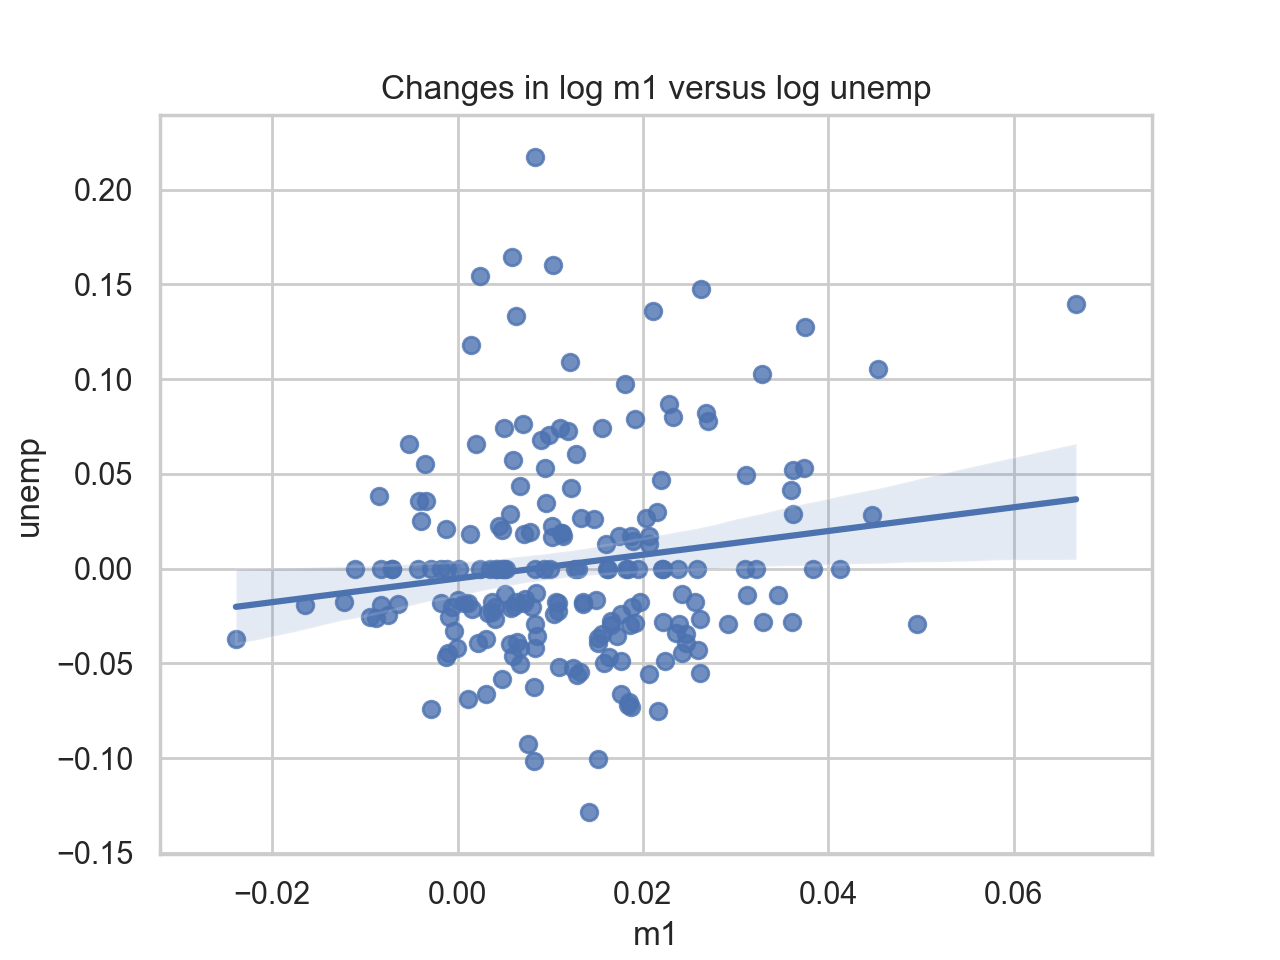

<IPython.core.display.Javascript object>


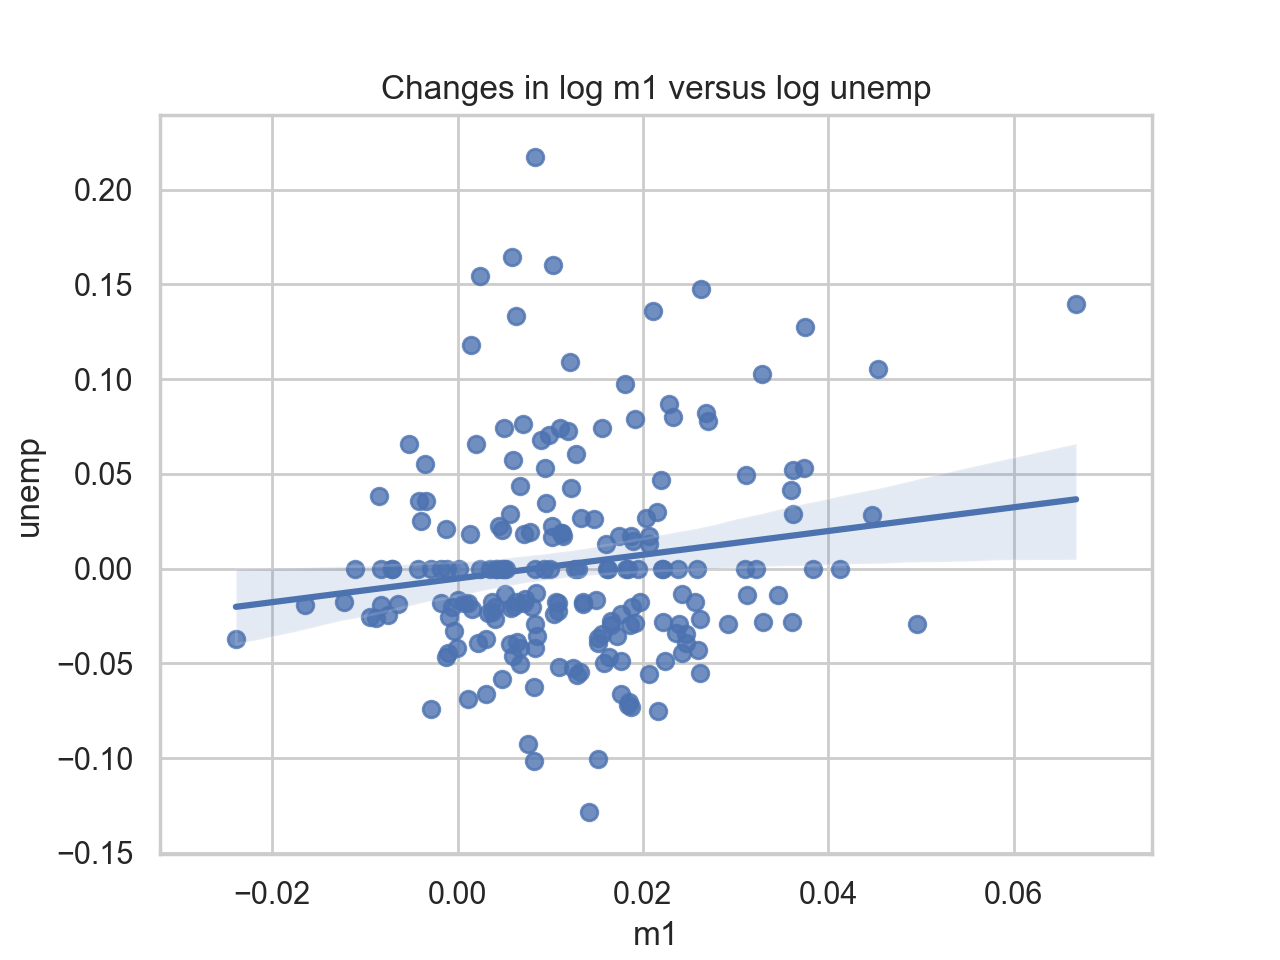

In [80]:
plt.figure()

In [81]:
sns.regplot('m1', 'unemp', data=trans_data)

In [82]:
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

Text(0.5, 1, 'Changes in log m1 versus log unemp')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:1295: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  squeeze=False)


<IPython.core.display.Javascript object>


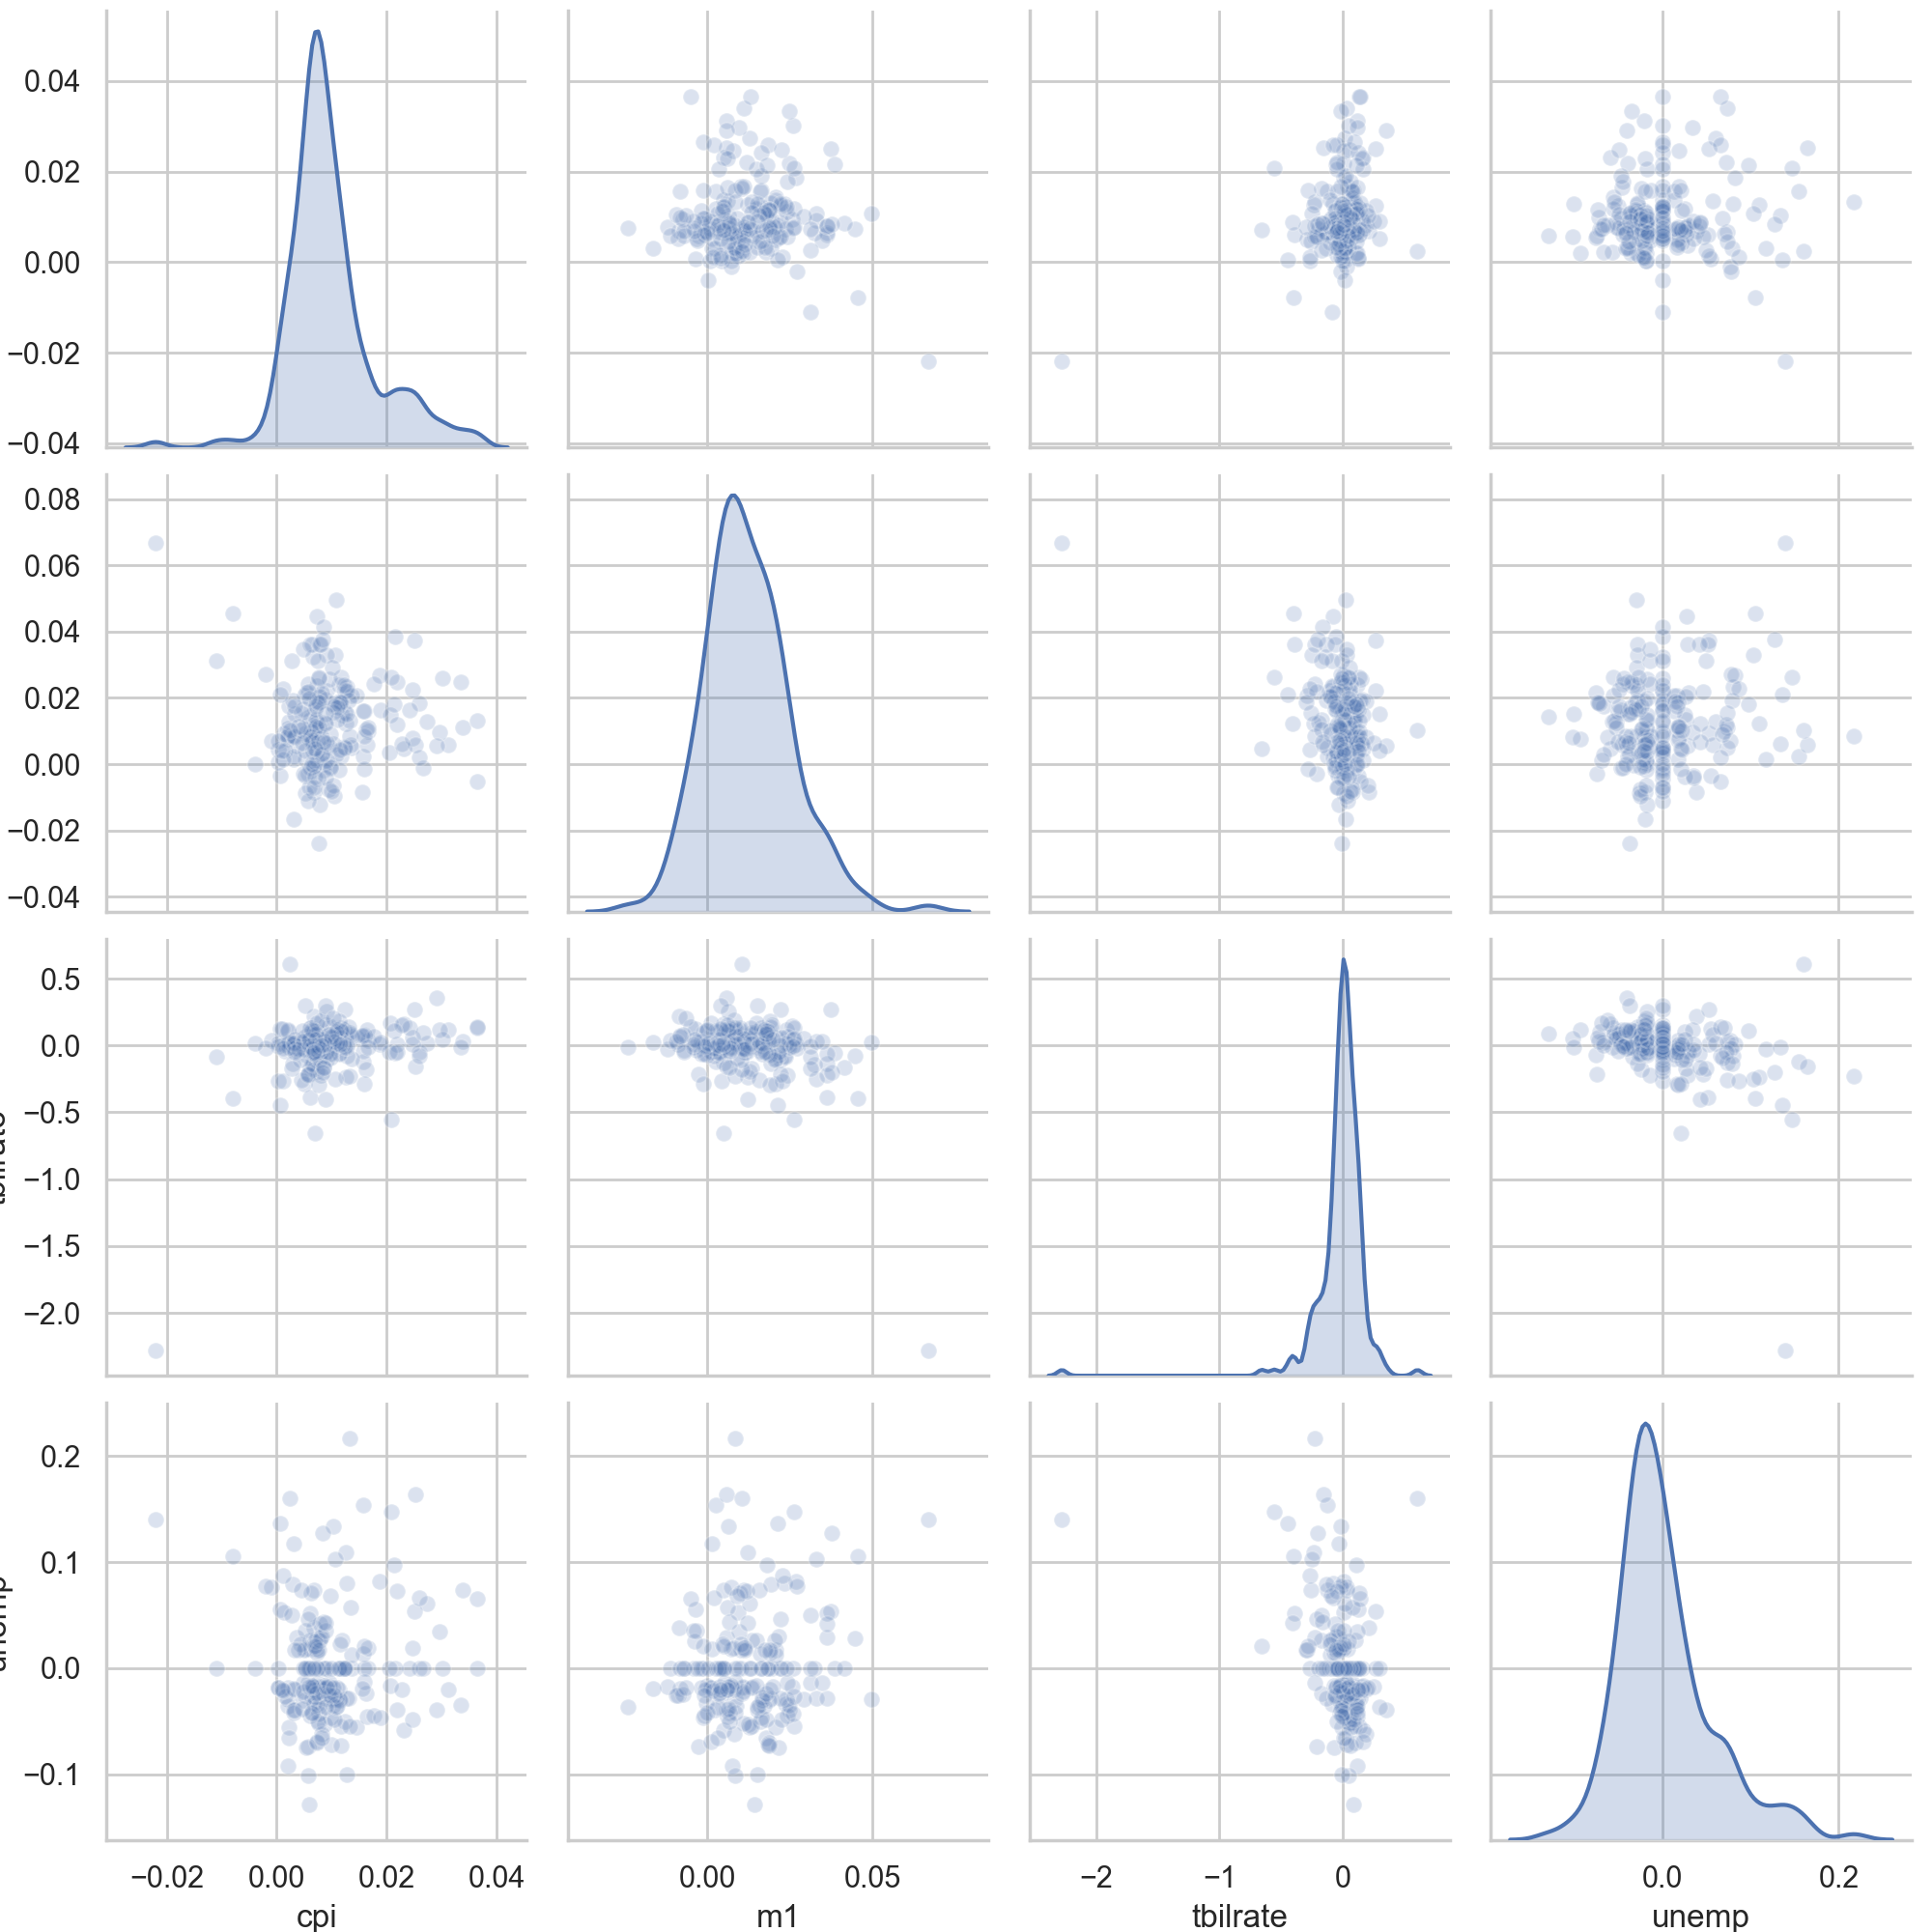

In [83]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### 9.2.5 分面网格和分类数据

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


<IPython.core.display.Javascript object>


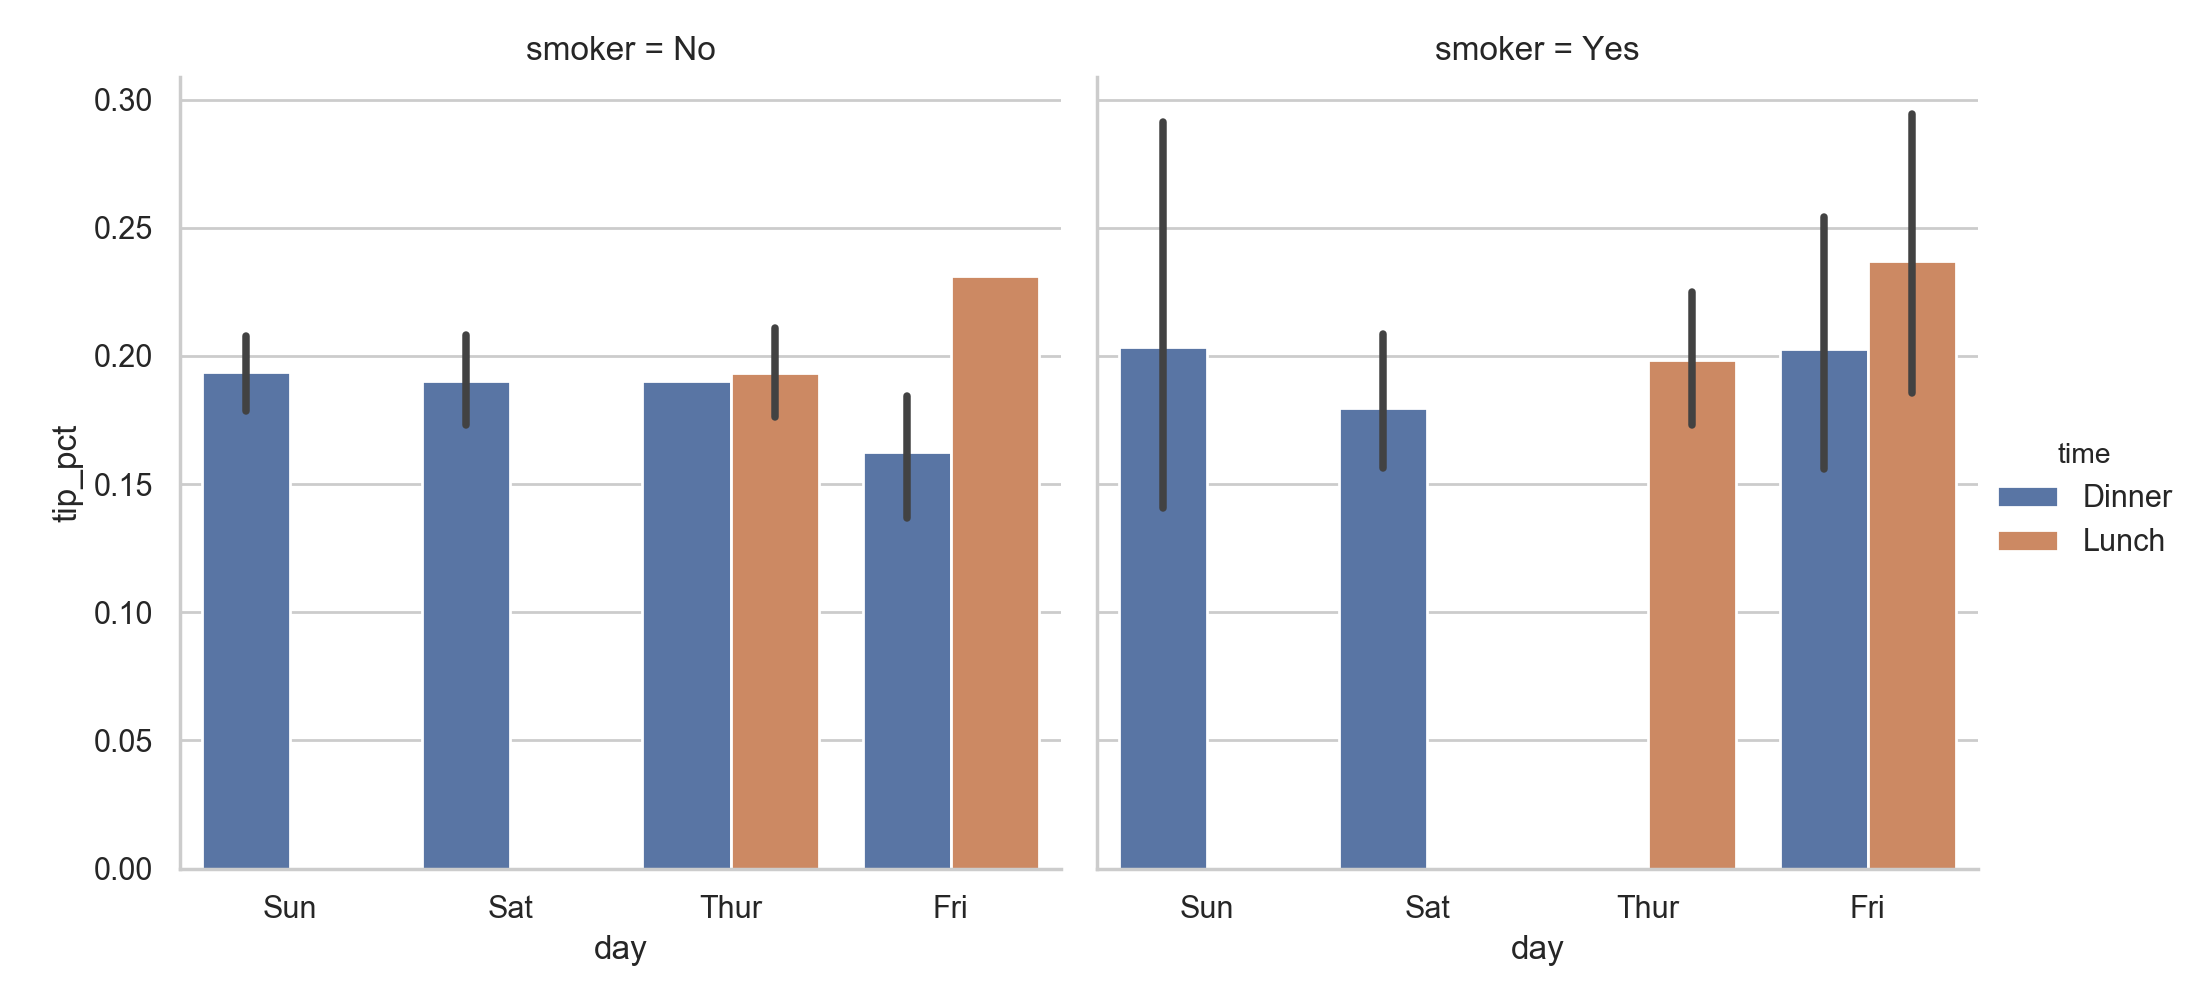

In [84]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
              kind='bar', data=tips[tips.tip_pct < 1])

<IPython.core.display.Javascript object>


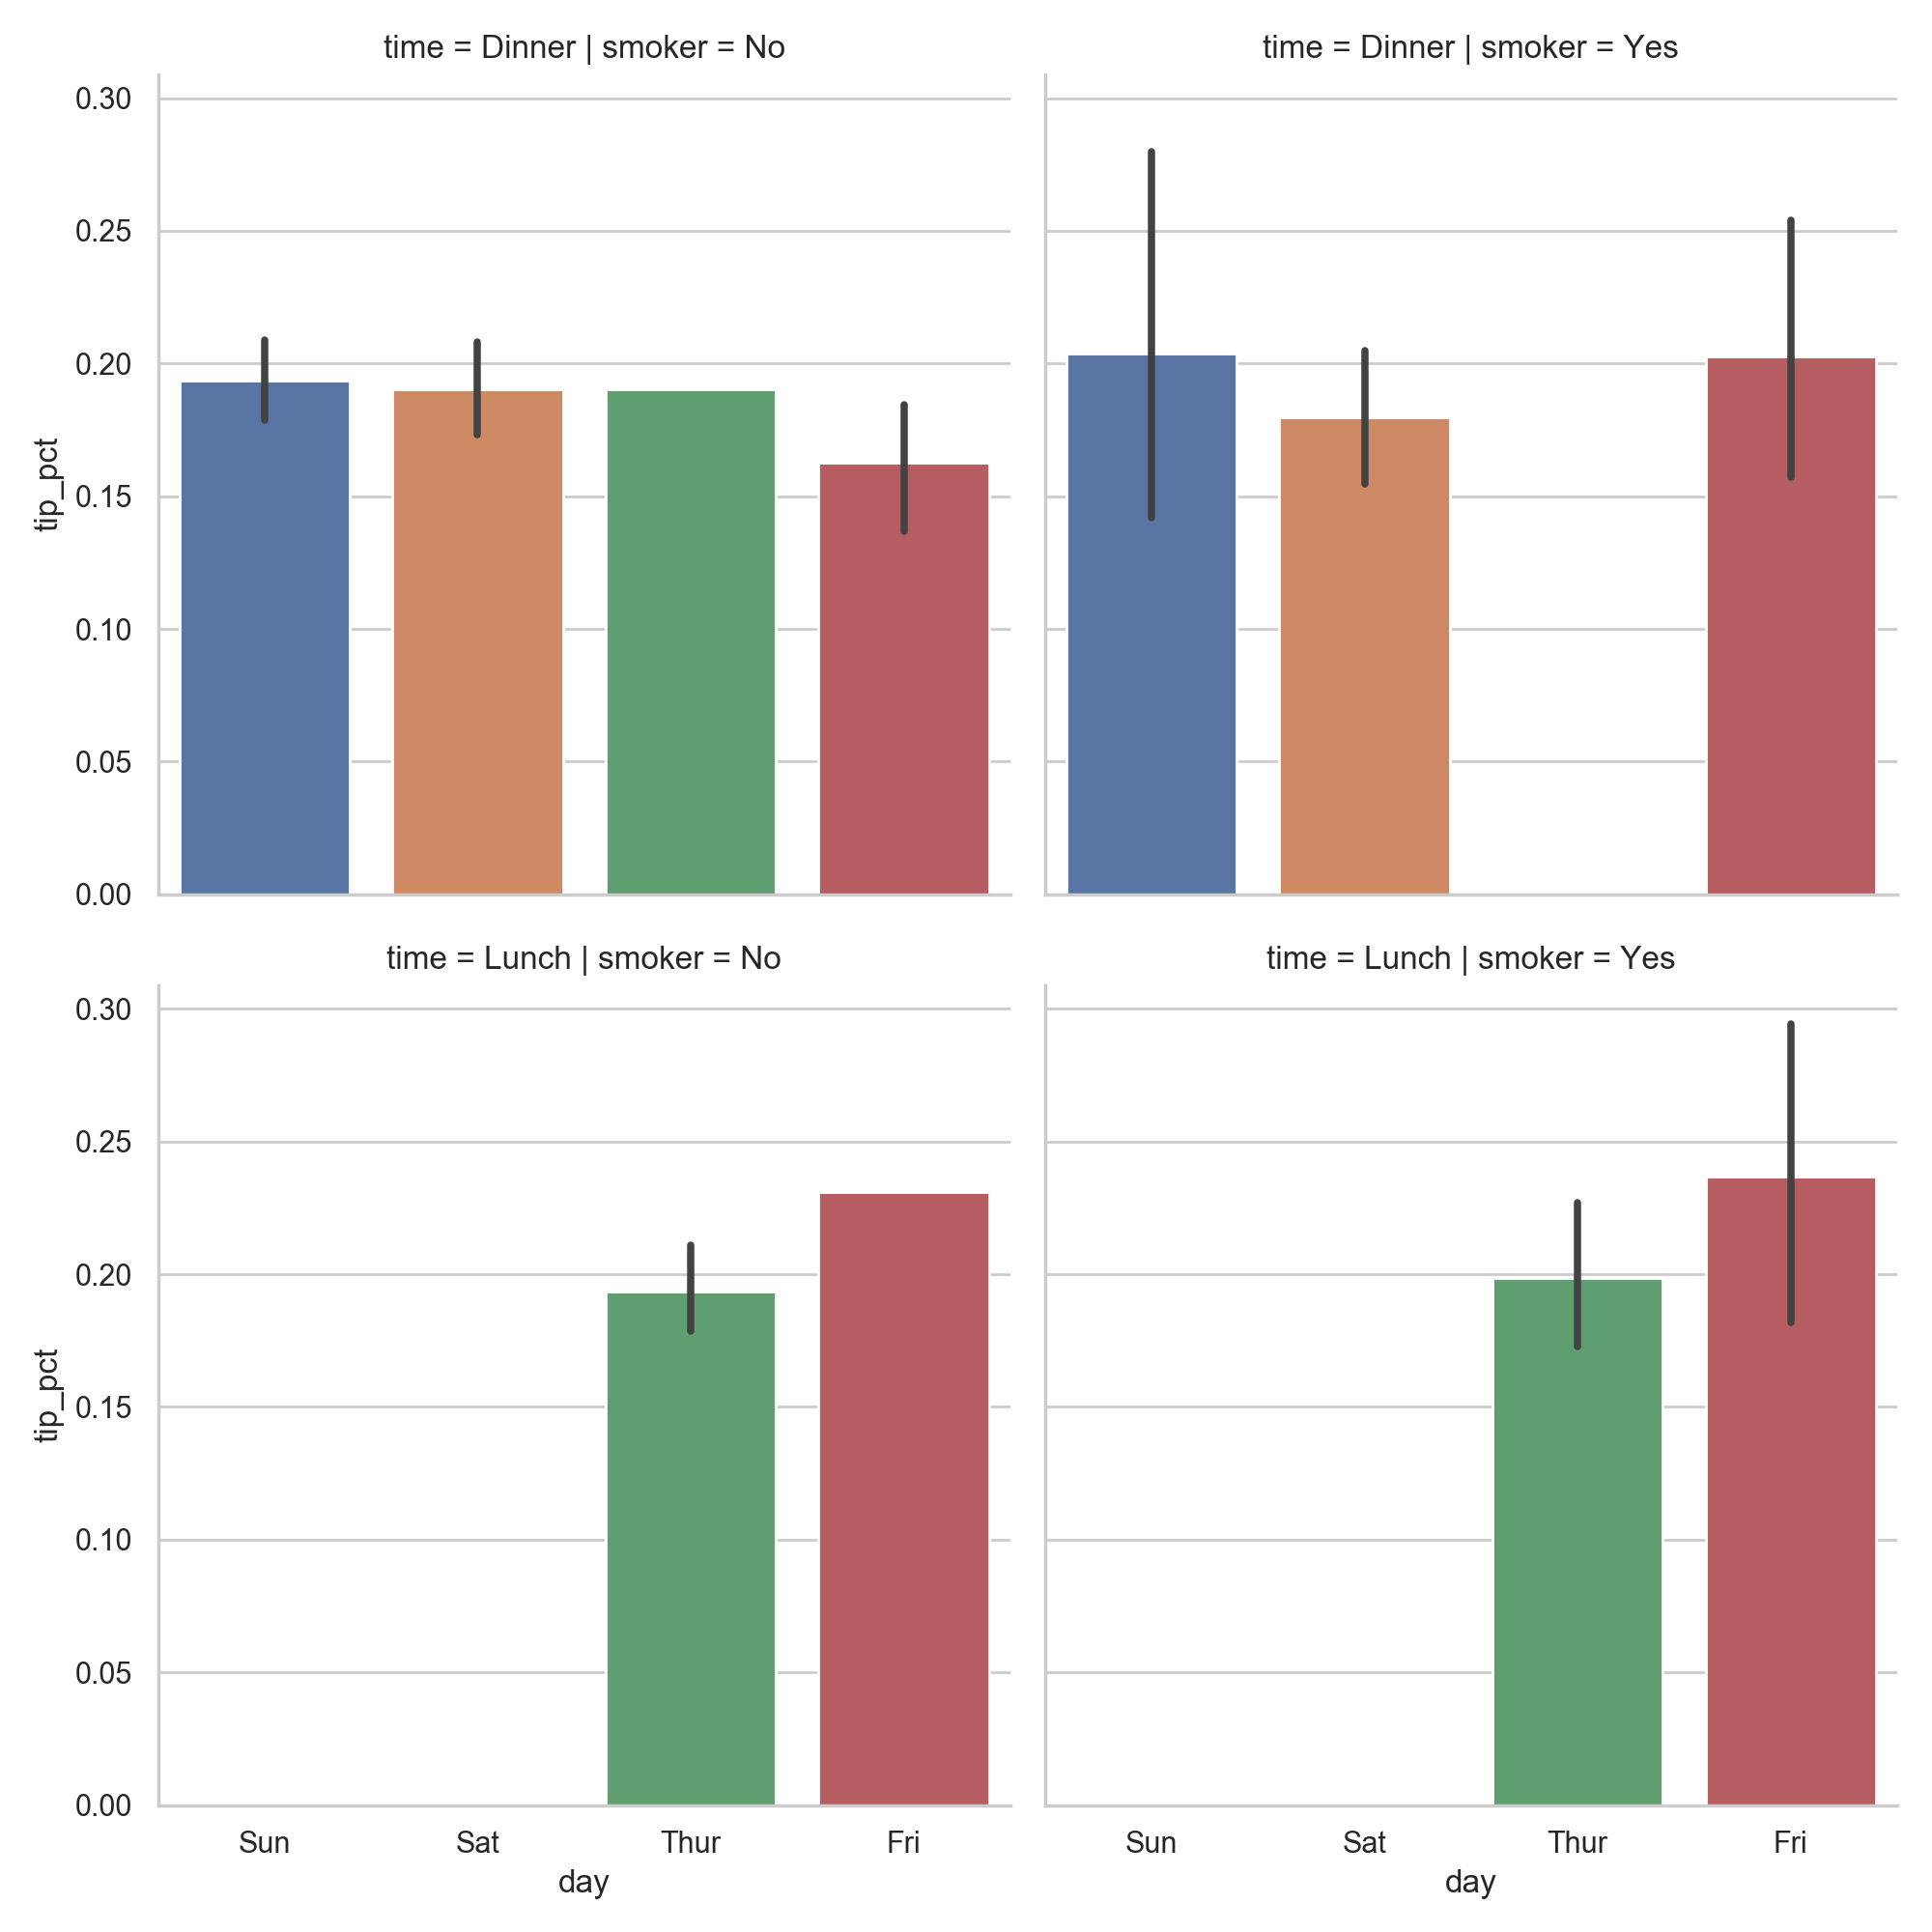

In [85]:
sns.factorplot(x='day', y='tip_pct', row='time',
              col='smoker', kind='bar',
              data=tips[tips.tip_pct < 1])

<IPython.core.display.Javascript object>


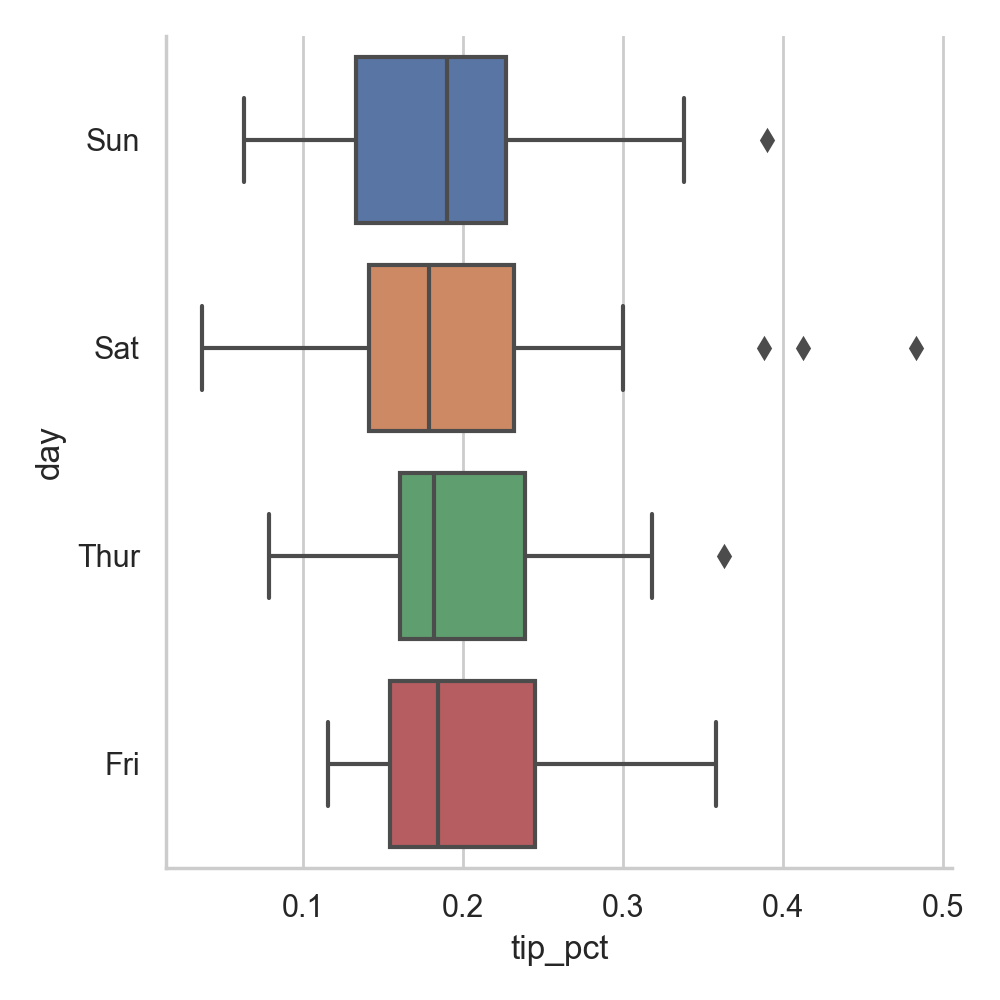

In [86]:
sns.factorplot(x='tip_pct', y='day', kind='box',
              data=tips[tips.tip_pct < 0.5])